# Prepare drive

In [0]:
# %tensorflow_version 1.x
# !pip install keras==2.2.4

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# %cd '/content/drive/My Drive/aominebka992/segmentation ISIC'
%cd '/content/drive/My Drive/Covid_Seg_Classification/Covid_EfficientNet/'

/content/drive/My Drive/Covid_Seg_Classification/Covid_EfficientNet


In [0]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.0218372days (1886.73sec)


In [0]:
!pip install import-ipynb
import import_ipynb
# import efficientunet1


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=8b944b5578e7eb3a362e150b5141f2cde78de3c7a4623600aeef9d2310a4b000
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras.callbacks import *
from tensorflow.keras.layers import *
import os
import numpy as np
np.warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage import color
from sklearn.model_selection import train_test_split
from PIL import Image
from IPython.utils import io
import warnings
warnings.filterwarnings('ignore') # we ignore a RuntimeWarning produced from dividing by zero
import scipy.io as sio

import lmdb, cv2, re, sys
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [0]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.8.68.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.8.68.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
clear model

In [0]:
import shutil
# method_class='GAPfinetune_EffB4'
method_class='Ens_Eff_DenseNet121'

folder_save1 = 'Save_Results'
if os.path.exists(folder_save1):
  shutil.rmtree(folder_save1)
  
os.mkdir(folder_save1)
folder_save = 'Save_Results/'+method_class
os.makedirs(folder_save)

image_size = (192, 288, 3)
img_sen = Input(shape = image_size)
input_shape=img_sen

# Prepare Data

##get data ref


In [0]:
#!wget https://challenge.kitware.com/api/v1/item/584ad08dcad3a51cc66c8e12/download -O abc.zip 

In [0]:
#!unzip abc.zip

In [0]:
#from google_drive_downloader import GoogleDriveDownloader as gdd
#gdd.download_file_from_google_drive(file_id='1m0u6Ic9ZoF-FS-_HRfIHKMdxNXztWLe7', dest_path='./5.zip', unzip=True)


In [0]:
# x_train_path='/content/ISIC-2017_Training_Data'
# y_train_path='/content/ISIC-2017_Training_Part1_GroundTruth'
# x_test_path='/content/ISIC-2017_Test_v2_Data'
# y_test_path='/content/ISIC-2017_Test_v2_Part1_GroundTruth'

In [0]:
# def remove(path):
#   os.chdir(path)
#   img_name= next(os.walk(path))[2]
#   for x in img_name:
#     if x.find(".jpg") ==-1:
#       os.remove(x)
#       print('remove ',x,'successfully')
# #remove('/content/drive/My Drive/segmentation learning/ISIC-2017 dataset/ISIC-2017_Training_Data')
# #remove('/content/drive/My Drive/segmentation learning/ISIC-2017 dataset/ISIC-2017_Test_v2_Data')

In [0]:
# size_w=192
# size_h =256
# def get_mask(image_name,mask_path):
#     img_mask = load_img(os.path.join(mask_path, image_name.replace(".jpg","_segmentation.png")),grayscale=True,target_size=(size_w,size_h))
#     img_mask = img_to_array(img_mask)
#     return img_mask/255.0

# def get_all(x_path,y_path):
#   img_name_list = next(os.walk(x_path))[2]
#   img_name_list = [hh for hh in img_name_list if hh.find('.jpg') != -1]
#   print(len(img_name_list))
#   img = np.zeros((len(img_name_list),size_w,size_h,3) )
#   mask = np.zeros((len(img_name_list),size_w,size_h,1))
#   for i, image_name in enumerate(img_name_list):
#     mask[i]=get_mask(image_name, y_path)
#     image_train = load_img(os.path.join(x_path, image_name),target_size=(size_w,size_h))
#     img[i] = img_to_array(image_train)
#     if i%100== 0:
#       plt.figure(i//100)
#       plt.subplot(1,2,1).imshow(img[i].astype(np.uint8))
#       plt.subplot(1,2,2).imshow(mask[i,:,:,0], cmap = 'gray')
#       plt.show()
  
#   return img,mask

In [0]:
#x_train,y_train=get_all(x_train_path,y_train_path)
#x_test,y_test= get_all(x_test_path,y_test_path)

save data# New Section

##get raw data and save npy


In [0]:
#@title Default title text
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

np.random.seed(1234)
# %matplotlib inline
# %cd COVID-CT
extract_des='COVID-CT/Images-processed/'
image_size = (192, 288, 3)

covid_fold = extract_des + 'CT_COVID'
noncovid_fold = extract_des + 'CT_NonCOVID'

train_text_pos = 'COVID-CT/Data-split/COVID/trainCT_COVID.txt'
test_text_pos = 'COVID-CT/Data-split/COVID/testCT_COVID.txt'
val_text_pos = 'COVID-CT/Data-split/COVID/valCT_COVID.txt'

train_text_neg = 'COVID-CT/Data-split/NonCOVID/trainCT_NonCOVID.txt'
test_text_neg = 'COVID-CT/Data-split/NonCOVID/testCT_NonCOVID.txt'
val_text_neg = 'COVID-CT/Data-split/NonCOVID/valCT_NonCOVID.txt'

prepare train

In [0]:
 import shutil
 store_file='COVID_CT_png'
 if os.path.exists(store_file):   
    shutil.rmtree(store_file)
os.mkdir(store_file)    
covid_dir_train= store_file+'/COVID/Train'
noncovid_dir_train=store_file+'/nonCOVID/Train'

os.makedirs(covid_dir_train)
os.makedirs(noncovid_dir_train)

covid_dir_test= store_file+'/COVID/Test'
noncovid_dir_test=store_file+'/nonCOVID/Test'

os.makedirs(covid_dir_test)
os.makedirs(noncovid_dir_test)

covid_dir_val= store_file+'/COVID/Val'
noncovid_dir_val=store_file+'/nonCOVID/Val'

os.makedirs(covid_dir_val)
os.makedirs(noncovid_dir_val)

covid_dir= store_file+'/COVID/Covid_all'
noncovid_dir=store_file+'/nonCOVID/nonCovid_all'

os.makedirs(covid_dir)
os.makedirs(noncovid_dir)

In [0]:

#@title Default title text
with open(train_text_pos, 'r') as fr:
  posimg_names = fr.read().split('\n')
  posimg_names = [aa for aa in posimg_names if aa != '']
  posimg_paths = [os.path.join(covid_fold, aa) for aa in posimg_names]

with open(train_text_neg, 'r') as fr:
  negimg_names = fr.read().split('\n')
  negimg_names = [aa for aa in negimg_names if aa != '']
  negimg_paths = [os.path.join(noncovid_fold, aa) for aa in negimg_names]

print(len(posimg_names), len(negimg_names))
neg_len = len(negimg_names)//5 + 1
mneg_len = len(negimg_names) - neg_len

train_len = len(posimg_names) + mneg_len
# neg_len = len(negimg_names)
# train_len = len(posimg_names) + neg_len
x_train = np.zeros((train_len, image_size[0], image_size[1], image_size[2]), dtype = np.uint8)
y_train = np.zeros((train_len), dtype = np.float32)
random_id = np.random.permutation(train_len)

for i in range(train_len):
  if i<len(posimg_names):
    img = cv2.imread(posimg_paths[i])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    cv2.imwrite(covid_dir_train+'/covid_train_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_train_'+str(i)+'.png',img)
    y_train[random_id[i]] = 1.0
  else:
    img = cv2.imread(negimg_paths[i-len(posimg_names)])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    cv2.imwrite(noncovid_dir_train+'/noncovid_train_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_train_'+str(i)+'.png',img)
    y_train[random_id[i]] = 0.0

  x_train[random_id[i]] = img


191 234


In [0]:
# neg_len = len(negimg_names)//5 + 1
# mneg_len = len(negimg_names) - neg_len

# x_train_pos = np.zeros((len(posimg_names), image_size[0], image_size[1], image_size[2]), dtype = np.uint8)
# x_train_neg = np.zeros((mneg_len, image_size[0], image_size[1], image_size[2]), dtype = np.uint8)
# y_train_pos = np.ones(len(posimg_names), dtype = np.float32)
# y_train_neg = np.zeros(mneg_len, dtype = np.float32)
# random_id_pos = np.random.permutation(len(posimg_names))
# random_id_neg = np.random.permutation(mneg_len)

# for j in range(len(posimg_names)):
#   img = cv2.imread(posimg_paths[j])
#   img = cv2.resize(img, (image_size[1],image_size[0]))

#   x_train_pos[random_id_pos[j]] = img  

# for k in range(len(negimg_names)):
#   img = cv2.imread(negimg_paths[k-len(posimg_names)])
#   img = cv2.resize(img, (image_size[1],image_size[0]))

#   x_train_neg[random_id_neg[k]] = img  

In [0]:
# print(x_train_pos.shape,x_train_neg.shape, x_train.shape)

(191, 192, 288, 3) (234, 192, 288, 3) (425, 192, 288, 3)


test part

In [0]:
with open(test_text_pos, 'r') as fr:
  posimg_names = fr.read().split('\n')
  posimg_names = [aa for aa in posimg_names if aa != '']
  posimg_paths = [os.path.join(covid_fold, aa) for aa in posimg_names]

with open(test_text_neg, 'r') as fr:
  negimg_names = fr.read().split('\n')
  negimg_names = [aa for aa in negimg_names if aa != '']
  negimg_paths = [os.path.join(noncovid_fold, aa) for aa in negimg_names]

print(len(posimg_names), len(negimg_names))
test_len = len(posimg_names) + len(negimg_names)
x_test = np.zeros((test_len, image_size[0], image_size[1], image_size[2]), dtype = np.uint8)
y_test = np.zeros((test_len), dtype = np.float32)
random_id = np.random.permutation(test_len)

for i in range(test_len):
  if i<len(posimg_names):
    img = cv2.imread(posimg_paths[i])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    y_test[random_id[i]] = 1.0
    cv2.imwrite(covid_dir_test+'/covid_test_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_test_'+str(i)+'.png',img)
  else:
    img = cv2.imread(negimg_paths[i-len(posimg_names)])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    y_test[random_id[i]] = 0.0
    cv2.imwrite(noncovid_dir_test+'/noncovid_test_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_test_'+str(i)+'.png',img)
  x_test[random_id[i]] = img



98 105


validation part

In [0]:
with open(val_text_pos, 'r') as fr:
  posimg_names = fr.read().split('\n')
  posimg_names = [aa for aa in posimg_names if aa != '']
  posimg_paths = [os.path.join(covid_fold, aa) for aa in posimg_names]

with open(val_text_neg, 'r') as fr:
  negimg_names = fr.read().split('\n')
  negimg_names = [aa for aa in negimg_names if aa != '']
  negimg_paths = [os.path.join(noncovid_fold, aa) for aa in negimg_names]

print(len(posimg_names), len(negimg_names))
val_len = len(posimg_names) + len(negimg_names)
x_val = np.zeros((val_len, image_size[0], image_size[1], image_size[2]), dtype = np.uint8)
y_val = np.zeros((val_len), dtype = np.float32)
random_id = np.random.permutation(val_len)

for i in range(val_len):
  if i<len(posimg_names):
    img = cv2.imread(posimg_paths[i])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    y_val[random_id[i]] = 1.0
    cv2.imwrite(covid_dir_val+'/covid_val_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_val_'+str(i)+'.png',img)
  else:
    img = cv2.imread(negimg_paths[i-len(posimg_names)])
    img = cv2.resize(img, (image_size[1],image_size[0]))
    y_val[random_id[i]] = 0.0

    cv2.imwrite(noncovid_dir_val+'/noncovid_val_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_val_'+str(i)+'.png',img)
  x_val[random_id[i]] = img

60 58


In [0]:
file_name='data_resize'
os.mkdir(file_name)
np.save('data_resize/x_train.npy',x_train)
np.save('data_resize/x_test.npy',x_test)
np.save('data_resize/x_val.npy',x_val)
np.save('data_resize/y_train.npy',y_train)
np.save('data_resize/y_test.npy',y_test)
np.save('data_resize/y_val.npy',y_val)



# reload raw

In [0]:
x_train= np.load("data_resize/x_train.npy")
y_train= np.load("data_resize/y_train.npy")

x_test= np.load("data_resize/x_test.npy")
y_test= np.load("data_resize/y_test.npy")

x_val= np.load("data_resize/x_val.npy")
y_val= np.load("data_resize/y_val.npy")

#Segmentation


In [0]:
# %tensorflow_version 1.x
# !pip install keras==2.2.4

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from keras.models import load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, Callback
import keras.backend as K
import shutil
# from tensorflow import ones_like, equal, log
from tensorflow.python import mul
import tensorflow as tf
from tensorflow.python.keras.utils.data_utils import Sequence



Using TensorFlow backend.


## do segment

In [0]:
#@title Default title text
from skimage.morphology import remove_small_objects, remove_small_holes
def segment_and_crop_wpp(segment_model, x_test, x_test_real, thresh_val = 0.5, add_pixel = 20, thresh_obj = 100, thresh_hole = 36):
  h, w = x_test.shape[1:3]
  y_preds = segment_model.predict(x_test)
  y_preds = y_preds > thresh_val
  for i, y_pred in enumerate(y_preds):
    remove_small_objects(y_pred, thresh_obj, in_place=True)
    remove_small_holes(y_pred, thresh_hole, in_place=True)
    y_pred = y_pred*1.0
    y_axis, x_axis, _ = np.where(y_pred == 1.0)
    y_min = np.min(y_axis)
    y_min = y_min - add_pixel if y_min >= add_pixel else 0
    y_max = np.max(y_axis)
    y_max = y_max + add_pixel if y_max < h - add_pixel else h-1
    x_min = np.min(x_axis)
    x_min = x_min - add_pixel if x_min >= add_pixel else 0
    x_max = np.max(x_axis)
    x_max = x_max + add_pixel if x_max < w - add_pixel else w-1
    img_new = x_test_real[i][y_min:y_max, x_min:x_max]
    img_new = cv2.resize(img_new, (w, h))
    x_test_real[i] = img_new
  return x_test_real

def segment_and_crop(segment_model, x_test, x_test_real, thresh_val = 0.5):
  h, w = x_test.shape[1:3]
  y_preds = segment_model.predict(x_test)
  y_preds = (y_preds > thresh_val)*1.0
  for i, y_pred in enumerate(y_preds):
    y_axis, x_axis, _ = np.where(y_pred == 1.0)
    y_min = np.min(y_axis)
    y_min = y_min - 5 if y_min >= 5 else 0
    y_max = np.max(y_axis)
    y_max = y_max + 5 if y_max < h - 5 else h-1
    x_min = np.min(x_axis)
    x_min = x_min - 5 if x_min >= 5 else 0
    x_max = np.max(x_axis)
    x_max = x_max + 5 if x_max < w - 5 else w-1
    img_new = x_test_real[i][y_min:y_max, x_min:x_max]
    img_new = cv2.resize(img_new, (w, h))
    x_test_real[i] = img_new
  return x_test_real


In [0]:
#@title Default title text

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# #  load your zip files from your Drive
# # https://drive.google.com/open?id=1rQK_uXu2brEUXNImFPtgqd6G2lecVFQf #giangptbk  Covid_segmentation_Classification
# # id_ = '1c91Ap-E0C-5bh-s9YTu9mqW4AyTDzMYL'
# id_ = '1rQK_uXu2brEUXNImFPtgqd6G2lecVFQf'
# last_weight_file = drive.CreateFile({'id': id_}) 
# last_weight_file.GetContentFile('model_segment_covid19_lung.hdf5')

model_segment = load_model('model_segment_covid19_lung.hdf5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









In [0]:
#@title Default title text
x_train_noseg =x_train
x_test_noseg=x_test
x_val_noseg=x_val
x_train = segment_and_crop_wpp(model_segment, x_train[...,:1], np.copy(x_train), add_pixel=20)
x_test = segment_and_crop_wpp(model_segment, x_test[...,:1], np.copy(x_test), add_pixel=20)
x_val = segment_and_crop_wpp(model_segment, x_val[...,:1], np.copy(x_val), add_pixel=20)

In [0]:
#@title Default title text
# store_file='CovidData_npy_crop20'
store_file='Covid_npy'
if os.path.exists(store_file):   
    shutil.rmtree(store_file)
os.mkdir(store_file)   
# np.save(store_file+'/x_train_crop5.npy',x_train_crop5)
# np.save(store_file+'/x_test_crop5.npy',x_test_crop5)
np.save(store_file+'/y_train.npy',y_train)
np.save(store_file+'/y_test.npy',y_test)

# np.save(store_file+'/x_train_crop10.npy',x_train_crop10)
# np.save(store_file+'/x_test_crop10.npy',x_test_crop10)
np.save(store_file+'/x_train.npy',x_train)
np.save(store_file+'/x_test.npy',x_test)

np.save(store_file+'/x_val.npy',x_val)
np.save(store_file+'/y_val.npy',y_val)

np.save(store_file+'/x_train_noseg.npy',x_train_noseg)
np.save(store_file+'/x_test_noseg.npy',x_test_noseg)
np.save(store_file+'/x_val_noseg.npy',x_val_noseg)

# shutil.make_archive('CovidData_npy', 'zip', 'CovidData_npy')



In [0]:
# # auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# weights_file = drive.CreateFile({'title' : 'CovidData_npy.zip'})

# weights_file.SetContentFile('CovidData_npy.zip')
# # weights_file.Upload()
# # drive.CreateFile({'id': weights_file.get('id')})

# Reload the segmented and croped data

In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
# x_train= np.load("Covid_npy/x_train.npy")
# y_train= np.load("Covid_npy/y_train.npy")
# x_test= np.load("Covid_npy/x_test.npy")
# y_test= np.load("Covid_npy/y_test.npy")
# x_val= np.load("Covid_npy/x_val.npy")
# y_val= np.load("Covid_npy/y_val.npy")

# x_train_noseg= np.load("Covid_npy/x_train_noseg.npy")
# x_test_noseg= np.load("Covid_npy/x_test_noseg.npy")
# x_val_noseg= np.load("Covid_npy/x_val_noseg.npy")

x_train= np.load("data_resize_new/x_train.npy")
y_train= np.load("data_resize_new/y_train.npy")
x_test= np.load("data_resize_new/x_test.npy")
y_test= np.load("data_resize_new/y_test.npy")
x_val= np.load("data_resize_new/x_val.npy")
y_val= np.load("data_resize_new/y_val.npy")


## save the cropped data as .png

In [0]:
 import shutil
 store_file='COVID_CT_crop'
 if os.path.exists(store_file):   
    shutil.rmtree(store_file)
os.mkdir(store_file)    
covid_dir_train= store_file+'/COVID/Train'
noncovid_dir_train=store_file+'/nonCOVID/Train'

os.makedirs(covid_dir_train)
os.makedirs(noncovid_dir_train)

covid_dir_test= store_file+'/COVID/Test'
noncovid_dir_test=store_file+'/nonCOVID/Test'

os.makedirs(covid_dir_test)
os.makedirs(noncovid_dir_test)

covid_dir_val= store_file+'/COVID/Val'
noncovid_dir_val=store_file+'/nonCOVID/Val'

os.makedirs(covid_dir_val)
os.makedirs(noncovid_dir_val)

covid_dir= store_file+'/COVID/Covid_all'
noncovid_dir=store_file+'/nonCOVID/nonCovid_all'

os.makedirs(covid_dir)
os.makedirs(noncovid_dir)

In [0]:
print(x_train.shape)

(378, 192, 288, 3)


In [0]:
train_len=x_train.shape[0]
for i in range(train_len):
  img=x_train[i,:,:,:]
  outcome=y_train[i]
  # plt.imshow(img,cmap='gray')
  if outcome>0:
    cv2.imwrite(covid_dir_train+'/covid_train_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_train_'+str(i)+'.png',img)
  else:
    cv2.imwrite(noncovid_dir_train+'/noncovid_train_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_train_'+str(i)+'.png',img)



In [0]:
test_len=x_test.shape[0]
for i in range(test_len):
  img=x_test[i,:,:,:]
  outcome=y_test[i]
  # plt.imshow(img,cmap='gray')
  if outcome>0:
    cv2.imwrite(covid_dir_test+'/covid_test_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_test_'+str(i)+'.png',img)
  else:
    cv2.imwrite(noncovid_dir_test+'/noncovid_test_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_test_'+str(i)+'.png',img)



In [0]:
val_len=x_val.shape[0]
for i in range(val_len):
  img=x_val[i,:,:,:]
  outcome=y_val[i]
  # plt.imshow(img,cmap='gray')
  if outcome>0:
    cv2.imwrite(covid_dir_val+'/covid_val_'+str(i)+'.png',img)
    cv2.imwrite(covid_dir+'/covid_val_'+str(i)+'.png',img)
  else:
    cv2.imwrite(noncovid_dir_val+'/noncovid_val_'+str(i)+'.png',img)
    cv2.imwrite(noncovid_dir+'/noncovid_val_'+str(i)+'.png',img)



##some stuffs


In [0]:
#!wget https://challenge.kitware.com/api/v1/item/584ad08dcad3a51cc66c8e12/download -O abc.zip 

In [0]:
#!unzip abc.zip

In [0]:
#from google_drive_downloader import GoogleDriveDownloader as gdd
#gdd.download_file_from_google_drive(file_id='1m0u6Ic9ZoF-FS-_HRfIHKMdxNXztWLe7', dest_path='./5.zip', unzip=True)


In [0]:
# x_train_path='/content/ISIC-2017_Training_Data'
# y_train_path='/content/ISIC-2017_Training_Part1_GroundTruth'
# x_test_path='/content/ISIC-2017_Test_v2_Data'
# y_test_path='/content/ISIC-2017_Test_v2_Part1_GroundTruth'

In [0]:
# def remove(path):
#   os.chdir(path)
#   img_name= next(os.walk(path))[2]
#   for x in img_name:
#     if x.find(".jpg") ==-1:
#       os.remove(x)
#       print('remove ',x,'successfully')
# #remove('/content/drive/My Drive/segmentation learning/ISIC-2017 dataset/ISIC-2017_Training_Data')
# #remove('/content/drive/My Drive/segmentation learning/ISIC-2017 dataset/ISIC-2017_Test_v2_Data')

In [0]:
# size_w=192
# size_h =256
# def get_mask(image_name,mask_path):
#     img_mask = load_img(os.path.join(mask_path, image_name.replace(".jpg","_segmentation.png")),grayscale=True,target_size=(size_w,size_h))
#     img_mask = img_to_array(img_mask)
#     return img_mask/255.0

# def get_all(x_path,y_path):
#   img_name_list = next(os.walk(x_path))[2]
#   img_name_list = [hh for hh in img_name_list if hh.find('.jpg') != -1]
#   print(len(img_name_list))
#   img = np.zeros((len(img_name_list),size_w,size_h,3) )
#   mask = np.zeros((len(img_name_list),size_w,size_h,1))
#   for i, image_name in enumerate(img_name_list):
#     mask[i]=get_mask(image_name, y_path)
#     image_train = load_img(os.path.join(x_path, image_name),target_size=(size_w,size_h))
#     img[i] = img_to_array(image_train)
#     if i%100== 0:
#       plt.figure(i//100)
#       plt.subplot(1,2,1).imshow(img[i].astype(np.uint8))
#       plt.subplot(1,2,2).imshow(mask[i,:,:,0], cmap = 'gray')
#       plt.show()
  
#   return img,mask

In [0]:
#x_train,y_train=get_all(x_train_path,y_train_path)
#x_test,y_test= get_all(x_test_path,y_test_path)

In [0]:
# x_train= np.load("data_resize_crop/x_train.npy")
# y_train= np.load("data_resize/y_train.npy")

# x_test= np.load("data_resize/x_test.npy")
# y_test= np.load("data_resize/y_test.npy")

# x_val= np.load("data_resize/x_val.npy")
# y_val= np.load("data_resize/y_val.npy")

In [0]:
from sklearn.utils import shuffle
x_train1,y=shuffle(x_train1, y)
print(y.shape)

(2000, 192, 256, 1)


In [0]:
x=x_train1/255
x_test=x_test1/255

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.15)
print(y_val.shape)

(300, 192, 256, 1)


# Subfunctions

##loss functions


In [0]:
import keras.backend as K

def dice_coef(y_true, y_pred, smooth=0.0):
    '''Average dice coefficient per batch.'''
    axes = (1,2,3)
    intersection = K.sum(y_true * y_pred, axis=axes)
    summation = K.sum(y_true + y_pred, axis=axes)
    
    return K.mean((2.0 * intersection + smooth) / (summation + smooth), axis=0)

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred, 0.0)
    #return 1.0 - dice_coef(y_true, y_pred)
  
def jaccard_coef_loss(y_true, y_pred):
    return 1.0 - jaccard_coef(y_true, y_pred, 1.0)

def jaccard_coef(y_true, y_pred, smooth=0.0):
    '''Average jaccard coefficient per batch.'''
    axes = (1,2,3)
    intersection = K.sum(y_true * y_pred, axis=axes)
    union = K.sum(y_true + y_pred, axis=axes) - intersection
    return K.mean( (intersection + smooth) / (union + smooth), axis=0)

def tversky(y_true, y_pred,  smooth = 1):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky_loss(y_true,y_pred,gamma = 0.75):
    pt_1 = tversky(y_true, y_pred)
    return K.pow((1-pt_1), gamma)

In [0]:
'''data_gen_args = dict(horizontal_flip=True,
                     vertical_flip=True)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

seed = 1234
bs = 8

image_generator = image_datagen.flow(x_train, seed=seed, batch_size=bs, shuffle=True)
mask_generator = mask_datagen.flow(y_train, seed=seed, batch_size=bs, shuffle=True)
steps=image_generator.n // bs+1
# Just zip the two generators to get a generator that provides augmented images and masks at the same time
train_generator = zip(image_generator, mask_generator)'''

##generation data

In [0]:
@tf.function
def gen_image(image,mask,seed1=42,seed2=1):
    image = tf.image.random_flip_left_right(image,seed=seed1)
    mask = tf.image.random_flip_left_right(mask,seed=seed1)

    image=tf.image.random_flip_up_down(image,seed=seed2)
    mask=tf.image.random_flip_up_down(mask,seed=seed2)

    return image, mask

In [0]:
batch_size = 64
buffer_size = x_train.shape[0]
steps_per_epoch = x_train.shape[0] // batch_size+1
AUTO= tf.data.experimental.AUTOTUNE

In [0]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train)).cache().shuffle(buffer_size).batch(batch_size).map(gen_image, num_parallel_calls=AUTO).repeat().prefetch(buffer_size=AUTO)
val_dataset=tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(batch_size*2)
test_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size*2)

ValueError: ignored

# Data augmentation and aux functions

In [0]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model, Input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet201

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from albumentations import Compose, HorizontalFlip, CLAHE, HueSaturationValue,RandomBrightness, RandomContrast, RandomGamma,ToFloat, ShiftScaleRotate, VerticalFlip, RandomSizedCrop

AUGMENTATIONS_TRAIN = Compose([
    HorizontalFlip(p=0.5),
    #VerticalFlip(p=0.5),
    RandomContrast(limit=0.1, p=0.5),
    #RandomGamma(gamma_limit=(60, 120), p=0.6),
    RandomBrightness(limit=0.05, p=0.5),
    #HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,val_shift_limit=10, p=.9),
    # CLAHE(p=1.0, clip_limit=2.0),
    RandomSizedCrop((180, 192), 192, 288, 1.5, p=0.6),
    ShiftScaleRotate(
        shift_limit=0.0, scale_limit=0.0, 
        rotate_limit= 10, border_mode=cv2.BORDER_REFLECT_101, p=0.6), 
    #ToFloat(max_value=255)
])

#cv2.BORDER_REFLECT_101
#cv2.BORDER_CONSTANT

AUGMENTATIONS_TEST = Compose([
    # CLAHE(p=1.0, clip_limit=2.0),
    ToFloat(max_value=255)
])

In [0]:
# id_ = 4
# for i in range(20):
#   img=AUGMENTATIONS_TRAIN(image = x_test[id_])['image']
#   plt.figure(i)
#   fig, axs = plt.subplots(1, 2, figsize = (8,8))
#   axs[0].imshow(x_test[id_]), axs[0].axis('off')
#   axs[1].imshow(img), axs[1].axis('off')
#   #print(img.dtype, img.shape, img.max())
# print(y_test[id_])

In [0]:
from keras.models import load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, Callback
import keras.backend as K
import shutil
# from tensorflow import ones_like, equal, log
from tensorflow.python import mul
import tensorflow as tf
from tensorflow.python.keras.utils.data_utils import Sequence

In [0]:
def generator(features, labels, batch_size, seq_det):
    # create empty arrays to contain batch of features and labels
    batch_features = np.zeros((batch_size, features.shape[1], features.shape[2], features.shape[3]))
    batch_labels = np.zeros((batch_size, labels.shape[1], labels.shape[2], labels.shape[3]))

    while True:
        # Fill arrays of batch size with augmented data taken randomly from full passed arrays
        indexes = random.sample(range(len(features)), batch_size)
        # Perform the exactly the same augmentation for X and y
        random_augmented_images, random_augmented_labels = do_augmentation(seq_det, features[indexes], labels[indexes])
        batch_features[:,:,:,:] = random_augmented_images[:,:,:,:]
        batch_labels[:,:,:,:] = random_augmented_labels[:,:,:,:]

        yield batch_features, batch_labels

class DataSequence(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentations):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augment = augmentations
        self.n = 0
        self.max = self.__len__()
 
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))
 
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        return np.stack([
            self.augment(image=x)["image"] for x in batch_x
        ], axis=0), np.array(batch_y)

    def __next__(self):
        if self.n >= self.max:
           self.n = 0
        result = self.__getitem__(self.n)
        self.n += 1
        return result

In [0]:
# image_size = (192, 288, 3)

In [0]:
batch_size = 16

generator_x = ImageDataGenerator(
    horizontal_flip = True,
    zoom_range = 0.1,
    shear_range = 5.0,
    rotation_range = 10
)
# train_gen = generator_x.flow(x_train, y_train, batch_size = batch_size, shuffle = False, seed = 1234)

train_gen = DataSequence(x_train, y_train, batch_size, augmentations=AUGMENTATIONS_TRAIN)


# optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
# model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
# clear model

#EfficientNet

In [0]:
!pip install -U efficientnet
import efficientnet.keras as efn

## compile and training

In [0]:
img_sen = Input(shape = image_size)

# pretrained_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
pretrained_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
#drop_layer = Dropout(rate = 0.2)(global_avg)
#out_fc1 = Dense(1, activation = 'sigmoid')(drop_layer)

model = Model(input = [img_sen], output = [out_fc1])


71892992/71892840 [==============================] - 1s 0us/step


##compile

In [0]:
#  optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
# model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
# model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.Nadam(0.001),metrics=['accuracy'])
# model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.Nadam(0.0001),metrics=['accuracy'])

In [0]:
# checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_acc:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
# # lr_decay = lr_scheduler()
# callback_list = [checkpoint]#, lr_decay]
# history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 100, callbacks = callback_list, validation_data = (x_test, y_test))


In [0]:
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
optimize3=tf.keras.optimizers.Nadam(3e-4)
# model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 99:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      # current_lr = 1e-4
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))
file_name = 'weights_save1'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)  
# mcp = ModelCheckpoint("/content/weights_save/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)
mcp=ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
# lr_decay = lr_scheduler()
# callback_list = [checkpoint]#, lr_decay]
earlystop= EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=2)
# rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=5, min_lr=1e-6, verbose=1)

# history1 = model.fit((x_train,y_train),validation_data=(x_val,y_val),steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp],verbose=1)
# history1 = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 200, callbacks = [earlystop,mcp],verbose=1, validation_data = (x_test, y_test))
# history1 = model.fit_generator(
#     train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500,
#     callbacks = [earlystop,mcp],verbose=1, 
#     validation_data = (x_val, y_val))

history1 = model.fit_generator(
    train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500,
    callbacks = [earlystop,mcp],verbose=1, 
    validation_data = (x_test, y_test))
model.save_weights("EfficientB4_COVID-19_segment_fitgen.h5")

## EfficientNet B5

In [0]:
img_sen = Input(shape = image_size)

# pretrained_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
pretrained_model = efn.EfficientNetB5(include_top = False, weights = 'imagenet', input_tensor = img_sen)
global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
#drop_layer = Dropout(rate = 0.2)(global_avg)
#out_fc1 = Dense(1, activation = 'sigmoid')(drop_layer)

model = Model(input = [img_sen], output = [out_fc1])


In [0]:
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
optimize3=tf.keras.optimizers.Nadam(3e-4)
# model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 99:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      # current_lr = 1e-4
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))
file_name = 'weights_save1'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)  
# mcp = ModelCheckpoint("/content/weights_save/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)
mcp=ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
# lr_decay = lr_scheduler()
# callback_list = [checkpoint]#, lr_decay]
earlystop= EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=2)
# rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=5, min_lr=1e-6, verbose=1)

# history1 = model.fit((x_train,y_train),validation_data=(x_val,y_val),steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp],verbose=1)
# history1 = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 200, callbacks = [earlystop,mcp],verbose=1, validation_data = (x_test, y_test))
# history1 = model.fit_generator(
#     train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500,
#     callbacks = [earlystop,mcp],verbose=1, 
#     validation_data = (x_val, y_val))

history1 = model.fit_generator(
    train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500,
    callbacks = [earlystop,mcp],verbose=1, 
    validation_data = (x_test, y_test))
model.save_weights("EfficientB5_COVID-19_segment_fitgen.h5")

#Inception

In [0]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

##Fine tuning

In [0]:
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)

In [0]:
print(y_train)

In [0]:
pre_trained_model = InceptionV3(input_shape=image_size, include_top=False, weights="imagenet")

In [0]:
for layer in pre_trained_model.layers:
    # print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

# print(len(pre_trained_model.layers))

In [0]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 4, 7, 2048)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
# x = layers.Dense(7, activation='softmax')(x)
x = layers.Dense(1, activation='sigmoid')(x)
# Configure and compile the model

model = Model(pre_trained_model.input, x)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

In [0]:
x_train= np.load("Covid_npy/x_train.npy")
y_train= np.load("Covid_npy/y_train.npy")
x_test= np.load("Covid_npy/x_test.npy")
y_test= np.load("Covid_npy/y_test.npy")
x_val= np.load("Covid_npy/x_val.npy")
y_val= np.load("Covid_npy/y_val.npy")

In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(x_val)

In [0]:
# batch_size = 64
batch_size = 16
epochs =10
# history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(x_val, y_val),
#                               verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size), 
#                               validation_steps=(x_val.shape[0] // batch_size))

# history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(x_val, y_val),
# #                               verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size))
checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))


Epoch 1/10
23/23 [==============================] - 18s 802ms/step - loss: 1.1399 - accuracy: 0.6188 - val_loss: 0.9328 - val_accuracy: 0.6271

Epoch 00001: saving model to weights_save1/weights.01-0.627.hdf5
Epoch 2/10
23/23 [==============================] - 18s 801ms/step - loss: 0.9950 - accuracy: 0.6243 - val_loss: 0.7292 - val_accuracy: 0.6186

Epoch 00002: saving model to weights_save1/weights.02-0.619.hdf5
Epoch 3/10
23/23 [==============================] - 18s 800ms/step - loss: 0.7069 - accuracy: 0.7099 - val_loss: 0.7767 - val_accuracy: 0.6186

Epoch 00003: saving model to weights_save1/weights.03-0.619.hdf5
Epoch 4/10
23/23 [==============================] - 18s 800ms/step - loss: 0.6571 - accuracy: 0.6823 - val_loss: 0.6473 - val_accuracy: 0.6525

Epoch 00004: saving model to weights_save1/weights.04-0.653.hdf5
Epoch 5/10
23/23 [==============================] - 18s 789ms/step - loss: 0.5272 - accuracy: 0.7376 - val_loss: 0.6090 - val_accuracy: 0.6610

Epoch 00005: saving 

In [0]:
for layer in pre_trained_model.layers[249:]:
    layer.trainable = True

In [0]:
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['acc'])

model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
#                                             min_lr=0.000001, cooldown=2)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [0]:
batch_size = 64
epochs = 35
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
#                               validation_steps=(X_val.shape[0] // batch_size),
#                               callbacks=[learning_rate_reduction])


checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

Epoch 1/35
5/5 [==============================] - 18s 4s/step - loss: 0.6102 - accuracy: 0.7625 - val_loss: 2.8391 - val_accuracy: 0.5085

Epoch 00001: saving model to weights_save1/weights.01-0.508.hdf5
Epoch 2/35
5/5 [==============================] - 6s 1s/step - loss: 0.8687 - accuracy: 0.6500 - val_loss: 1.4212 - val_accuracy: 0.5678

Epoch 00002: saving model to weights_save1/weights.02-0.568.hdf5
Epoch 3/35
5/5 [==============================] - 6s 1s/step - loss: 0.7378 - accuracy: 0.6750 - val_loss: 2.0826 - val_accuracy: 0.5763

Epoch 00003: saving model to weights_save1/weights.03-0.576.hdf5
Epoch 4/35
5/5 [==============================] - 6s 1s/step - loss: 0.7360 - accuracy: 0.6351 - val_loss: 3.1354 - val_accuracy: 0.5254

Epoch 00004: saving model to weights_save1/weights.04-0.525.hdf5
Epoch 5/35
5/5 [==============================] - 6s 1s/step - loss: 0.6364 - accuracy: 0.7000 - val_loss: 7.2655 - val_accuracy: 0.5339

Epoch 00005: saving model to weights_save1/weight

In [0]:
loss_val, acc_val = model.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

118/118 [==============================] - 2s 14ms/step
Validation: accuracy = 0.584746  ;  loss_v = 2.422329


In [0]:
# y_test = to_categorical(y_test)
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

203/203 [==============================] - 3s 14ms/step
Test: accuracy = 0.709360  ;  loss = 2.172061


In [0]:
model.save("InceptionV3FT.h5")

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'Training and validation loss')

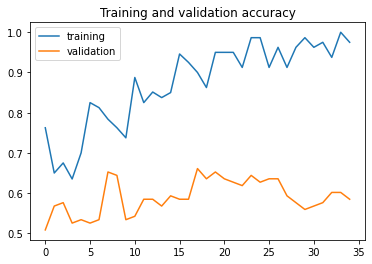

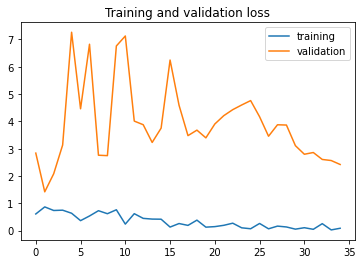

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

In [0]:
clear model

## Retraining

In [0]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)

In [0]:
pre_trained_model = InceptionV3(input_shape=image_size, include_top=False, weights="imagenet")

In [0]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
# print(len(pre_trained_model.layers))

In [0]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 4, 7, 2048)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
# x = layers.Dense(7, activation='softmax')(x)
x = layers.Dense(1, activation='sigmoid')(x)
# Configure and compile the model

model = Model(pre_trained_model.input, x)
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

Training

Here we retrain using the whole model instead of performing transfer learning. The reason for this is the issue with batch-normalization layer implemented in Keras. During training the network will always use the mini-batch statistics either the BN layer is frozen or not; also during inference it will use the previously learned statistics of the frozen BN layers. As a result, if we fine-tune the top layers, their weights will be adjusted to the mean/variance of the new dataset. Nevertheless, during inference they will receive data which are scaled differently because the mean/variance of the original dataset will be used. Consequently, performing transfer-learning with InceptionV3 will result in very bad validation accuracy. For solution to this issue, have a look at: https://github.com/keras-team/keras/pull/9965 and https://github.com/keras-team/keras/issues/9214. For now, let's just retrain the whole model with very small learning_rate = 0.0001 and large momentum and a learning_rate_reduction function that halves the learning whenever the validation accuracy doesn't change for a 3 consecutive epochs. We will train for only 20 epochs so that the weights of the original pretrained model won't change too much and overfit the train data.

Feature Extraction

Before we even retrain our model, it's better that we freeze all the layers in InceptionV3 and just train our top fully-connected and classification layers so that the weights for these layers won't be too random. The intuition for this is that if we didn't perform feature-extraction, then the gradient would be too large and would change the pretrained weights too much.


In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(x_val)

In [0]:
batch_size = 64
epochs = 3
# history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(x_val, y_val),
#                               verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size), 
#                               validation_steps=(x_val.shape[0] // batch_size))


checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

Epoch 1/3
5/5 [==============================] - 7s 1s/step - loss: 2.7859 - accuracy: 0.4625 - val_loss: 77.4996 - val_accuracy: 0.5085

Epoch 00001: saving model to weights_save1/weights.01-0.508.hdf5
Epoch 2/3
5/5 [==============================] - 4s 725ms/step - loss: 1.2565 - accuracy: 0.5375 - val_loss: 13.8614 - val_accuracy: 0.5254

Epoch 00002: saving model to weights_save1/weights.02-0.525.hdf5
Epoch 3/3
5/5 [==============================] - 4s 703ms/step - loss: 1.6800 - accuracy: 0.5270 - val_loss: 87.2789 - val_accuracy: 0.5085

Epoch 00003: saving model to weights_save1/weights.03-0.508.hdf5


Retraining

Now, we are retraining the whole models. The goal is to just tune the weights a bit for our dataset and avoid changing the pretrained weights too much!


In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [0]:
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['acc'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [0]:
model.summary()

In [0]:
batch_size = 64
epochs = 20
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
#                               validation_steps=(X_val.shape[0] // batch_size),
#                               callbacks=[learning_rate_reduction])


checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

Epoch 1/20
5/5 [==============================] - 21s 4s/step - loss: 1.2412 - accuracy: 0.6250 - val_loss: 1.2607 - val_accuracy: 0.5000

Epoch 00001: saving model to weights_save1/weights.01-0.500.hdf5
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 1.4539 - accuracy: 0.5750 - val_loss: 1.2243 - val_accuracy: 0.4661

Epoch 00002: saving model to weights_save1/weights.02-0.466.hdf5
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.8944 - accuracy: 0.6250 - val_loss: 0.9587 - val_accuracy: 0.3983

Epoch 00003: saving model to weights_save1/weights.03-0.398.hdf5
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.9057 - accuracy: 0.5676 - val_loss: 1.6627 - val_accuracy: 0.4831

Epoch 00004: saving model to weights_save1/weights.04-0.483.hdf5
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.5917 - accuracy: 0.6351 - val_loss: 1.1334 - val_accuracy: 0.4576

Epoch 00005: saving model to weights_save1/weight

In [0]:
loss_val, acc_val = model.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

Even though this model overfits the training data, we also observe some significant improvement with the validation accuracy. Our final validation accuracy is 86.9%, a nearly 10% improvement from the baseline model, which justifies some more training time. We can also see that this model is extremely "sensitive", a small change in learning rate can can change the model by a whole lot. Future work on choosing learning rate as well as monitor learning rate is needed for further improvement. 

In [0]:
# y_test = to_categorical(y_test)

In [0]:
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

In [0]:
model.save("InceptionV3.h5")

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

# DenseNet 201- layer freeze (bad)

##fine tuning

In [0]:
input_shape=img_sen
pre_trained_model = DenseNet201(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in pre_trained_model.layers:
    print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

print(len(pre_trained_model.layers))


In [0]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

In [0]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
# x = layers.Dense(7, activation='softmax')(x)
x = layers.Dense(1, activation='sigmoid')(x)
# Configure and compile the model

model = Model(pre_trained_model.input, x)
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [0]:
batch_size = 32
epochs = 3
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size), 
#                               validation_steps=(X_val.shape[0] // batch_size))

checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

In [0]:
pre_trained_model.layers[481].name

In [0]:
for layer in pre_trained_model.layers[481:]:
    layer.trainable = True

In [0]:
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['acc'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [0]:
batch_size = 32
epochs = 30
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
#                               validation_steps=(X_val.shape[0] // batch_size),
#                               callbacks=[learning_rate_reduction])

checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

In [0]:
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

In [0]:
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

In [0]:
model.save("DenseNetFT.h5")

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

##retrain

In [0]:
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)

In [0]:
input_shape=img_sen
# input_shape=(192, 256, 3)
pre_trained_model = DenseNet201(input_shape=input_shape, include_top=False, weights="imagenet")

In [0]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

In [0]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

define the model

In [0]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
# x = layers.Dense(7, activation='softmax')(x)
x = layers.Dense(1, activation='sigmoid')(x)
# Configure and compile the model

model = Model(pre_trained_model.input, x)
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

feature extraction

In [0]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [0]:
batch_size = 32
epochs = 3
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size), 
#                               validation_steps=(X_val.shape[0] // batch_size))

checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

retraining

In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [0]:
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['acc'])

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [0]:
batch_size = 32
epochs = 20
# history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
#                               verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
#                               validation_steps=(X_val.shape[0] // batch_size),
#                               callbacks=[learning_rate_reduction])

checkpoint = ModelCheckpoint('weights_save1/weights.{epoch:02d}-{val_accuracy:.3f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

# lr_decay = lr_scheduler()
callback_list = [checkpoint]#, lr_decay]
history = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs = epochs, callbacks = callback_list,
                              validation_data = (x_val, y_val))

In [0]:
loss_val, acc_val = model.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

In [0]:
y_test = to_categorical(y_test)
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

In [0]:
model.save("DenseNetFull.h5")

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

# DenseNet 201- Global Average Pooling

In [0]:
import numpy as np
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras import models
# from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet201
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.layers import ZeroPadding2D, Cropping2D
from keras.engine.topology import Layer
from keras.layers import Activation,BatchNormalization,Flatten,Conv2D,Lambda, add, average, Input, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D, Dense
import tensorflow as tf

In [0]:
img_sen = Input(shape = image_size)   

pretrained_model = DenseNet201(include_top = False, weights = 'imagenet', input_tensor = img_sen)

global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)

model = models.Model(input = [img_sen], output = [out_fc1])

In [0]:
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
optimize2 = Adam(lr = 1e-4)
model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])

## training

In [0]:
# optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
# model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])

file_name = 'weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 59:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
lr_decay = lr_scheduler()
callback_list = [checkpoint, lr_decay]


# history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))

history = model.fit_generator(train_gen, epochs = 100,
                              callbacks = callback_list,
                              validation_data = (x_test, y_test))


a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_DenseNet201_finetune.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('DenseNet201_finetune.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})




Epoch 1/100
24/24 [==============================] - 136s 6s/step - loss: 0.4886 - accuracy: 0.7407 - val_loss: 0.6582 - val_accuracy: 0.6601

Epoch 00001: saving model to weights_save/weights.01-0.6601.hdf5
Epoch 2/100
24/24 [==============================] - 68s 3s/step - loss: 0.1507 - accuracy: 0.9603 - val_loss: 0.6496 - val_accuracy: 0.6897

Epoch 00002: saving model to weights_save/weights.02-0.6897.hdf5
Epoch 3/100
24/24 [==============================] - 68s 3s/step - loss: 0.0631 - accuracy: 0.9947 - val_loss: 0.9671 - val_accuracy: 0.6798

Epoch 00003: saving model to weights_save/weights.03-0.6798.hdf5
Epoch 4/100
24/24 [==============================] - 67s 3s/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.6332 - val_accuracy: 0.8079

Epoch 00004: saving model to weights_save/weights.04-0.8079.hdf5
Epoch 5/100
24/24 [==============================] - 68s 3s/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.9636 - val_accuracy: 0.7537

Epoch 00005: saving model to 

In [0]:
model.load_weights('Good_weights_save/DenseNet201_finetune_weights.18-0.8325.hdf5')
model.save_weights('DenseNet201_finetune5.hdf5')


##Densenet 201 val acc=0.8325

#DenseNet 169- Global Average Pooling

In [0]:
# clear model

##define model

In [0]:
import numpy as np
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras import models
# from keras.applications.densenet import DenseNet121
# from keras.applications.densenet import DenseNet201
from keras.applications.densenet import DenseNet169
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.layers import ZeroPadding2D, Cropping2D
from keras.engine.topology import Layer
from keras.layers import Activation,BatchNormalization,Flatten,Conv2D,Lambda, add, average, Input, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D, Dense
import tensorflow as tf

In [0]:
img_sen = Input(shape = image_size)   

pretrained_model = DenseNet169(include_top = False, weights = 'imagenet', input_tensor = img_sen)

global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)

model = models.Model(input = [img_sen], output = [out_fc1])
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])

##training

In [0]:


file_name = 'weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 159:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
lr_decay = lr_scheduler()
callback_list = [checkpoint, lr_decay]


# history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))

history = model.fit_generator(train_gen, epochs = 200,
                              callbacks = callback_list,
                              validation_data = (x_test, y_test))


a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_DenseNet169_finetune.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('DenseNet169_finetune.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})




51879936/51877672 [==============================] - 1s 0us/step
Epoch 1/200
24/24 [==============================] - 108s 4s/step - loss: 0.5494 - accuracy: 0.7619 - val_loss: 3.1701 - val_accuracy: 0.5320

Epoch 00001: saving model to weights_save/weights.01-0.5320.hdf5
Epoch 2/200
24/24 [==============================] - 56s 2s/step - loss: 0.3775 - accuracy: 0.8386 - val_loss: 0.8561 - val_accuracy: 0.6798

Epoch 00002: saving model to weights_save/weights.02-0.6798.hdf5
Epoch 3/200
24/24 [==============================] - 55s 2s/step - loss: 0.2107 - accuracy: 0.9101 - val_loss: 0.9933 - val_accuracy: 0.6453

Epoch 00003: saving model to weights_save/weights.03-0.6453.hdf5
Epoch 4/200
24/24 [==============================] - 55s 2s/step - loss: 0.1485 - accuracy: 0.9365 - val_loss: 1.6153 - val_accuracy: 0.6650

Epoch 00004: saving model to weights_save/weights.04-0.6650.hdf5
Epoch 5/200
24/24 [==============================] - 56s 2s/step - loss: 0.1221 - accuracy: 0.9365 - val_l

In [0]:
model.load_weights('Good_weights_save/DenseNet169_finetune_weights.30-0.8374.h5')
model.save_weights('DenseNet169_finetune.h5')

## Densenet169: val_accuracy: 0.8374


# DenseNet121- Global Average Pooling

## define model

In [0]:
clear model

In [0]:
import numpy as np
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras import models
from keras.applications.densenet import DenseNet121
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.layers import ZeroPadding2D, Cropping2D
from keras.engine.topology import Layer
from keras.layers import Activation,BatchNormalization,Flatten,Conv2D,Lambda, add, average, Input, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D, Dense
import tensorflow as tf

In [0]:


img_sen = Input(shape = image_size)   

pretrained_model = DenseNet121(include_top = False, weights = 'imagenet', input_tensor = img_sen)

global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)

model = models.Model(input = [img_sen], output = [out_fc1])

##training

In [0]:
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
optimize2 = Adam(lr = 1e-4)
model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])

file_name = 'weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 159:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
lr_decay = lr_scheduler()
callback_list = [checkpoint, lr_decay]


# history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))

history = model.fit_generator(train_gen, epochs = 200,
                              callbacks = callback_list,
                              validation_data = (x_test, y_test))


a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_DenseNet121_finetune.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('DenseNet121_finetune.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})




Epoch 1/200
24/24 [==============================] - 75s 3s/step - loss: 0.5273 - accuracy: 0.7487 - val_loss: 0.5484 - val_accuracy: 0.7143

Epoch 00001: saving model to weights_save/weights.01-0.7143.hdf5
Epoch 2/200
24/24 [==============================] - 46s 2s/step - loss: 0.2404 - accuracy: 0.9233 - val_loss: 0.6000 - val_accuracy: 0.6601

Epoch 00002: saving model to weights_save/weights.02-0.6601.hdf5
Epoch 3/200
24/24 [==============================] - 45s 2s/step - loss: 0.1349 - accuracy: 0.9683 - val_loss: 1.5216 - val_accuracy: 0.5320

Epoch 00003: saving model to weights_save/weights.03-0.5320.hdf5
Epoch 4/200
24/24 [==============================] - 45s 2s/step - loss: 0.0786 - accuracy: 0.9841 - val_loss: 0.6715 - val_accuracy: 0.7488

Epoch 00004: saving model to weights_save/weights.04-0.7488.hdf5
Epoch 5/200
24/24 [==============================] - 45s 2s/step - loss: 0.0361 - accuracy: 0.9974 - val_loss: 0.9260 - val_accuracy: 0.6995

Epoch 00005: saving model to w

In [0]:
# file_name = 'weights_save'
# if os.path.exists(file_name):
#   shutil.rmtree(file_name)
  
# os.mkdir(file_name)

# class lr_scheduler(Callback):
#   def on_epoch_end(self, epoch, logs = {}):
#     if epoch == 159:
#       current_lr = K.eval(self.model.optimizer.lr)
#       current_lr = current_lr / 10
#       K.set_value(self.model.optimizer.lr, current_lr)
#       print(K.eval(self.model.optimizer.lr))

# checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
# lr_decay = lr_scheduler()
# callback_list = [checkpoint, lr_decay]
# # history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))
# history = model.fit_generator(train_gen,
#                               epochs = 200, callbacks = callback_list,
#                               validation_data = (x_test, y_test))

a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_DenseNet121_finetune.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('DenseNet121_finetune.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
# model.load_weights('Good_weights_save/DenseNet121_finetune.hdf5')



## DenseNet 121 :val_accuracy: 0.8473

Epoch 130/200
24/24 [==============================] - 45s 2s/step - loss: 5.9543e-05 - accuracy: 1.0000 - val_loss: 0.9276 - 
val_accuracy: 0.8473

Epoch 00130: saving model to weights_save/weights.130-0.8473.hdf5
Epoch 131/200
24/24 [==============================] - 45s 2s/step - loss: 5.0951e-05 - accuracy: 1.0000 - val_loss: 0.9326 - val_accuracy: 0.8424

In [0]:
# model.load_weights('Good_weights_save/DenseNet121_finetune.hdf5')

# Exception

## train from scratch

In [0]:
clear model

##define model

In [0]:
from keras.models import Model
from keras import layers
from keras.layers import Dense, Input, BatchNormalization, Activation
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
# from keras.applications.imagenet_utils import _obtain_input_shape
from keras.utils.data_utils import get_file

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'

def Xception_s(input_shape=None,min_size=71, data_format='channels_last', include_top=False):

	# Determine proper input shape
	# input_shape = _obtain_input_shape(None, default_size=299, min_size=71, data_format='channels_last', include_top=False)

	img_input = Input(shape=input_shape)

	# Block 1
	x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(img_input)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = Conv2D(64, (3, 3), use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 2
	x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 2 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 3
	x = Activation('relu')(x)
	x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 3 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	residual = Conv2D(728, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 4
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	# Block 5 - 12
	for i in range(8):
		residual = x

		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)
		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)
		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)

		x = layers.add([x, residual])

	residual = Conv2D(1024, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 13
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 13 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	# Block 14
	x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	# Block 14 part 2
	x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	# Fully Connected Layer
	x = GlobalAveragePooling2D()(x)
	x = Dense(1000, activation='softmax')(x)

	inputs = img_input

	# Create model
	model = Model(inputs, x, name='xception')

	# Download and cache the Xception weights file
	weights_path = get_file('xception_weights.h5', WEIGHTS_PATH, cache_subdir='models')

	# load weights
	model.load_weights(weights_path)

	return model

##training

In [0]:
model = Xception_s(input_shape=image_size)

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])



In [0]:
file_name = 'weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 159:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
lr_decay = lr_scheduler()
callback_list = [checkpoint, lr_decay]
# history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))
history = model.fit_generator(train_gen,
                              epochs = 200, callbacks = callback_list,
                              validation_data = (x_test, y_test))

a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_exception_scratch.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('Exception_scratch.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})




## fine tuning

In [0]:
import numpy as np
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras import models
from keras.applications.densenet import DenseNet121
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.layers import ZeroPadding2D, Cropping2D
from keras.engine.topology import Layer
from keras.layers import Activation,BatchNormalization,Flatten,Conv2D,Lambda, add, average, Input, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D, Dense
import tensorflow as tf
from keras.applications import Xception


In [0]:

img_sen = Input(shape = image_size)    
pretrained_model = Xception(include_top = False, weights = 'imagenet', input_tensor = img_sen)

global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)

model = models.Model(input = [img_sen], output = [out_fc1])

83689472/83683744 [==============================] - 6s 0us/step


In [0]:
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
model.compile(optimizer = optimize2, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
file_name = 'weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

class lr_scheduler(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 159:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

checkpoint = ModelCheckpoint('weights_save/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')
lr_decay = lr_scheduler()
callback_list = [checkpoint, lr_decay]
# history = model.fit_generator(generator_x.flow(x_train, y_train, batch_size = 16), epochs = 200, callbacks = callback_list, validation_data = (x_test, y_test))
history = model.fit_generator(train_gen,
                              epochs = 100, callbacks = callback_list,
                              validation_data = (x_test, y_test))

a = history.history

list_trainacc = a['acc']
list_testacc = a['val_accuracy']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_trainacc, 'r-')
plt.plot(list_testacc, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

sio.savemat('list_metrics_exception_finetune.mat', {'train_acc': list_trainacc, 'train_loss': list_trainloss, 'test_acc': list_testacc, 'test_loss': list_testloss})
# weights_file = drive.CreateFile({'title':'list_metrics_OM_1_continue.mat'})
# weights_file.SetContentFile('list_metrics.mat')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})
argmax = [i for i, a in enumerate(list_testacc) if a == max(list_testacc)]
model.evaluate(x_test, y_test)
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
model.save_weights('Exception_finetune.h5')
# weights_file = drive.CreateFile({'title' : '.h5'})
# weights_file.SetContentFile('.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})




Epoch 1/200
24/24 [==============================] - 419s 17s/step - loss: 0.5077 - accuracy: 0.7513 - val_loss: 0.7154 - val_accuracy: 0.6453

Epoch 00001: saving model to weights_save/weights.01-0.6453.hdf5
Epoch 2/200
24/24 [==============================] - 408s 17s/step - loss: 0.2344 - accuracy: 0.8915 - val_loss: 0.8604 - val_accuracy: 0.6700

Epoch 00002: saving model to weights_save/weights.02-0.6700.hdf5
Epoch 3/200
 6/24 [======>.......................] - ETA: 4:34 - loss: 0.0966 - accuracy: 0.9896

#Ensemble

In [0]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, fbeta_score, recall_score, precision_score
def cal_confusion_matrics(y_pred, y_true, thresh_val = 0.5):
  y_binary = np.where(y_pred >= thresh_val, 1.0, 0.0)
  true_positive = 0
  false_negative = 0
  false_positive = 0
  true_negative = 0
  for i, items in enumerate(y_binary):
    if items == y_true[i]:
      if items == 1.0:
        true_positive += 1
      else:
        true_negative += 1
    else:
      if items == 1.0:
        false_positive += 1
      else:
        false_negative += 1

  sensitivity = true_positive / (true_positive + false_negative)
  specificity = true_negative / (true_negative + false_positive)
  accuracy = (true_positive + true_negative) / y_pred.shape[0]
  return sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive)

def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.901, 0.01):
        score = fbeta_score(y_true, np.array(y_pred)>thresh, beta = 1)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

## Reload EfficientNet B4

In [0]:
!pip install -U efficientnet
import efficientnet.keras as efn

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
# img_sen = Input(shape = image_size)

# # pretrained_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
# pre_eff_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
# global_avg = GlobalAveragePooling2D()(pre_eff_model.output)
# out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
# #drop_layer = Dropout(rate = 0.2)(global_avg)
# #out_fc1 = Dense(1, activation = 'sigmoid')(drop_layer)

# Eff_model = Model(input = [img_sen], output = [out_fc1])
# optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
# optimize2 = Adam(lr = 3e-4)
# optimize3=tf.keras.optimizers.Nadam(3e-4)
# # model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
# Eff_model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

# Eff_model.load_weights("EfficientB4_COVID-19_segment_fitgen.h5")
# # Eff_model.load_weights('weights.13-0.872.hdf5')
# # Eff_model.load_weights('classify.hdf5')#bad



In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
# x_train= np.load("Covid_npy/x_train.npy")
# y_train= np.load("Covid_npy/y_train.npy")
# x_test= np.load("Covid_npy/x_test.npy")
# y_test= np.load("Covid_npy/y_test.npy")
# x_val= np.load("Covid_npy/x_val.npy")
# y_val= np.load("Covid_npy/y_val.npy")

# x_train_noseg= np.load("Covid_npy/x_train_noseg.npy")
# x_test_noseg= np.load("Covid_npy/x_test_noseg.npy")
# x_val_noseg= np.load("Covid_npy/x_val_noseg.npy")

x_train= np.load("data_resize_new/x_train.npy")
y_train= np.load("data_resize_new/y_train.npy")
x_test= np.load("data_resize_new/x_test.npy")
y_test= np.load("data_resize_new/y_test.npy")
x_val= np.load("data_resize_new/x_val.npy")
y_val= np.load("data_resize_new/y_val.npy")


In [0]:
clear Eff_model

In [0]:

img_sen = Input(shape = image_size)

pretrained_model = efn.EfficientNetB4(include_top = False, weights = 'imagenet', input_tensor = img_sen)
global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
#drop_layer = Dropout(rate = 0.2)(global_avg)
#out_fc1 = Dense(1, activation = 'sigmoid')(drop_layer)

Eff_model = Model(input = [img_sen], output = [out_fc1])
Eff_model.load_weights("EfficientB4_COVID-19_segment_fitgen_store.h5")
# Eff_model.load_weights("EfficientB4_COVID-19_2stages_best.h5")

# Eff_model.load_weights('weights.13-0.872.hdf5')

optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
Eff_model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

## reload DenseNet

In [0]:
#@title Default title text
import numpy as np
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras import models
from keras.applications.densenet import DenseNet121
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.layers import ZeroPadding2D, Cropping2D
from keras.engine.topology import Layer
from keras.layers import Activation,BatchNormalization,Flatten,Conv2D,Lambda, add, average, Input, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D, Dense
import tensorflow as tf

In [0]:
clear densenet121_model

In [0]:

img_sen = Input(shape = image_size)   

pretrained_model = DenseNet121(include_top = False, weights = 'imagenet', input_tensor = img_sen)

global_avg = GlobalAveragePooling2D()(pretrained_model.output)
out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
densenet121_model = models.Model(input = [img_sen], output = [out_fc1])
# densenet121_model.load_weights('DenseNet121_finetune.h5')
# densenet121_model.load_weights('weights_save/weights.76-0.8473.hdf5')
# densenet121_model.load_weights('Good_weights_save/Copy of weights.13-0.8522.hdf5')
# densenet121_model.load_weights('Good_weights_save/Copy of weights.63-0.8473.hdf5')

densenet121_model.load_weights('Good_weights_save/Copy of weights.18-0.8473.hdf5')
optimize = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
optimize2 = Adam(lr = 3e-4)
densenet121_model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])


In [0]:
# densenet121_model.load_weights('DenseNet121_finetune.h5')

##reload inception

In [0]:
#Define InceptionV3
input_shape=img_sen
model_input = Input(shape=input_shape)
inception = InceptionV3(input_shape=input_shape, input_tensor=model_input, include_top=False, weights=None)
for layer in inception.layers:
    layer.trainable = True

inception_last_layer = inception.get_layer('mixed10')
print('last layer output shape:', inception_last_layer.output_shape)
inception_last_output = inception_last_layer.output

# Flatten the output layer to 1 dimension
x_inception = layers.GlobalMaxPooling2D()(inception_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_inception = layers.Dense(512, activation='relu')(x_inception)
# Add a dropout rate of 0.7
x_inception = layers.Dropout(0.5)(x_inception)
# Add a final sigmoid layer for classification
x_inception = layers.Dense(7, activation='softmax')(x_inception)

# Configure and compile the model

inception_model = Model(model_input, x_inception)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
inception_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
inception_model.load_weights("InceptionV3full.h5")

##Ensemble model

##ref ensembe (not work

In [0]:
def ensemble(model, model_input):
    outputs = [model.outputs[0] for model in models]
    y = layers.Average()(outputs)
    model = Model(model_input, y, name='ensemble')
    return model

In [0]:
def ensemble2(models, img_sen):

    # outputs = [model.outputs[0] for model in models]
    # y = layers.Average()(outputs)
    # model = Model(model_input, y, name='ensemble')

    # global_avg = GlobalAveragePooling2D()(models.output)
    # out_fc1 = Dense(1, activation = 'sigmoid')(global_avg)
  outputs = [model.outputs[0] for model in models]
  y = layers.Average()(outputs)          
  model = Model(img_sen, y, name='ensemble')
  return model

In [0]:
model_input = Input(shape=image_size)
ensemble_model = ensemble2([Eff_model,model], model_input)#ensemble densenet with efficientNet
# ensemble_model = ensemble([denseNet_model, inception_model], model_input)
# ensemble_model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])
optimize2 = Adam(lr = 3e-4)
optimize3=tf.keras.optimizers.Nadam(3e-4)
# model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])
ensemble_model.compile(optimizer = optimize2, loss = "binary_crossentropy", metrics = ['accuracy'])

In [0]:
# batch_size = 16

# generator_x = ImageDataGenerator(
#     horizontal_flip = True,
#     zoom_range = 0.1,
#     shear_range = 5.0,
#     rotation_range = 10
# )
# # train_gen = generator_x.flow(x_train, y_train, batch_size = batch_size, shuffle = False, seed = 1234)

# train_gen = DataSequence(x_train, y_train, batch_size, augmentations=AUGMENTATIONS_TRAIN)

## Evaluate

In [0]:
probabilities_eff =Eff_model.predict(x_test)
Eff_model.evaluate(x_test,y_test)

203/203 [==============================] - 8s 38ms/step


[0.6714913510336664, 0.871921181678772]

In [0]:
probabilities_densenet121=densenet121_model.predict(x_test)
densenet121_model.evaluate(x_test,y_test)

203/203 [==============================] - 7s 34ms/step


[0.8151970637842939, 0.8472906351089478]

Ensemble_EffB4_DenseNet121
recall= 0.8776 ,precision= 0.8515
sen= 0.8776 , spec= 0.8571 ,acc= 0.867 ,confmatrix= (86, 12, 90, 15)
auc= 0.9192 ,averagePrecision= 0.9051 ,F1= 0.8643


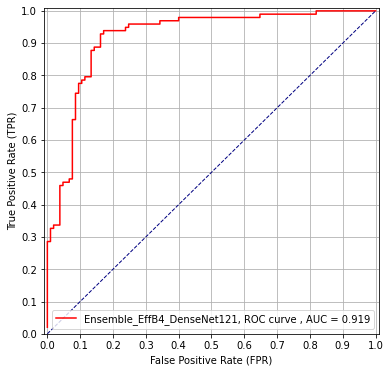

In [0]:
method_show='Ensemble_EffB4_DenseNet121'
y_pred=(probabilities_eff + probabilities_densenet121) * 1/2
thresh_val = 0.5
sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive) = cal_confusion_matrics(y_pred, y_test, thresh_val = thresh_val)
auc = roc_auc_score(y_test, y_pred)
aps = average_precision_score(y_test, y_pred)
f1 = fbeta_score(y_test, 1.0*(y_pred>thresh_val), beta = 1)
# print(recall_score(y_test, 1.0*(y_pred>thresh_val)), precision_score(y_test, 1.0*(y_pred>thresh_val)))
# print(sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive))
# print(auc, aps, f1)
recal_val=recall_score(y_test, 1.0*(y_pred>thresh_val))
prec_val=precision_score(y_test, 1.0*(y_pred>thresh_val))
print(method_show)
print('recall=',round(recal_val,4),',precision=',round(prec_val,4))
print('sen=',round(sensitivity,4), ', spec=',round(specificity,4), ',acc=',round(accuracy,4), ',confmatrix=',(true_positive, false_negative, true_negative, false_positive))
print('auc=',round(auc,4), ',averagePrecision=' ,round(aps,4),',F1=',round(f1,4))

tpr = []
fpr = []
tpr2 = []
fpr2 = []
for i in range(50001):
  thresh_val = i*0.00002
  a, b, c, d = cal_confusion_matrics(y_pred, y_test, thresh_val=thresh_val)
  tpr.append(a)
  fpr.append(1-b)
  # a2, b2, c2, d2 = cal_confusion_matrics(y_pred2, y_test, thresh_val=thresh_val)
  # tpr2.append(a2)
  # fpr2.append(1-b2)

axisRange = [0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.figure(figsize=(6,6))
lw = 1
plt.grid(True)
# plt.plot(fpr2, tpr2,'b-',label='ROC curve without segment step' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred2),3)))
plt.plot(fpr, tpr,'r-',label=method_show+', ROC curve ' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred),3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

Ensemble_EffB4_DenseNet121:

recall= 0.9184 ,precision= 0.8333

sen= 0.9184 , spec= 0.8286 ,acc= 0.8719 ,
confmatrix= (90, 8, 87, 18)

auc= 0.9183 ,averagePrecision= 0.9018 ,F1= 0.8738

EfficientNetB4
recall= 0.9184 ,precision= 0.8333
sen= 0.9184 , spec= 0.8286 ,acc= 0.8719 ,confmatrix= (90, 8, 87, 18)
auc= 0.9264 ,averagePrecision= 0.9149 ,F1= 0.8738


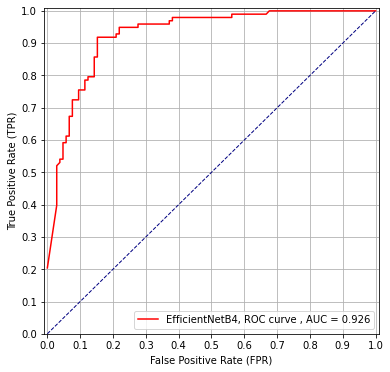

In [0]:
y_pred=probabilities_eff 
method_show='EfficientNetB4'
# y_pred=(probabilities_eff + probabilities_densenet121) * 1/2
# method_show='Ensemble_EffB4_DenseNet121'
thresh_val = 0.5
sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive) = cal_confusion_matrics(y_pred, y_test, thresh_val = thresh_val)
auc = roc_auc_score(y_test, y_pred)
aps = average_precision_score(y_test, y_pred)
f1 = fbeta_score(y_test, 1.0*(y_pred>thresh_val), beta = 1)
# print(recall_score(y_test, 1.0*(y_pred>thresh_val)), precision_score(y_test, 1.0*(y_pred>thresh_val)))
# print(sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive))
# print(auc, aps, f1)
recal_val=recall_score(y_test, 1.0*(y_pred>thresh_val))
prec_val=precision_score(y_test, 1.0*(y_pred>thresh_val))
print(method_show)
print('recall=',round(recal_val,4),',precision=',round(prec_val,4))
print('sen=',round(sensitivity,4), ', spec=',round(specificity,4), ',acc=',round(accuracy,4), ',confmatrix=',(true_positive, false_negative, true_negative, false_positive))
print('auc=',round(auc,4), ',averagePrecision=' ,round(aps,4),',F1=',round(f1,4))

tpr = []
fpr = []
tpr2 = []
fpr2 = []
for i in range(50001):
  thresh_val = i*0.00002
  a, b, c, d = cal_confusion_matrics(y_pred, y_test, thresh_val=thresh_val)
  tpr.append(a)
  fpr.append(1-b)
  # a2, b2, c2, d2 = cal_confusion_matrics(y_pred2, y_test, thresh_val=thresh_val)
  # tpr2.append(a2)
  # fpr2.append(1-b2)

axisRange = [0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.figure(figsize=(6,6))
lw = 1
plt.grid(True)
# plt.plot(fpr2, tpr2,'b-',label='ROC curve without segment step' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred2),3)))
plt.plot(fpr, tpr,'r-',label=method_show+', ROC curve ' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred),3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

EfficientNetB4

recall= 0.9286 ,precision= 0.7845

sen= 0.9286 , spec= 0.7619 ,acc= 0.8424 ,
confmatrix= (91, 7, 80, 25)

auc= 0.9189 ,averagePrecision= 0.8968 ,F1= 0.8505

DenseNet121
recall= 0.8061 ,precision= 0.8778
sen= 0.8061 , spec= 0.8952 ,acc= 0.8522 ,confmatrix= (79, 19, 94, 11)
auc= 0.9017 ,averagePrecision= 0.8799 ,F1= 0.8404


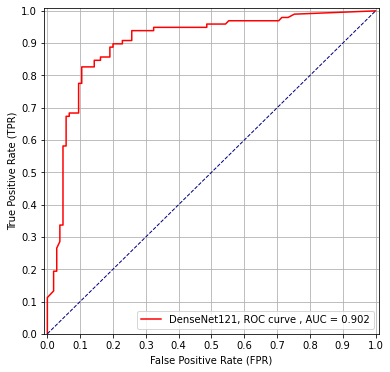

In [0]:

y_pred=probabilities_densenet121
method_show='DenseNet121'
# y_pred=probabilities_eff 
# method_show='EfficientNetB4'
# y_pred=(probabilities_eff + probabilities_densenet121) * 1/2
# method_show='Ensemble_EffB4_DenseNet121'
thresh_val = 0.5
sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive) = cal_confusion_matrics(y_pred, y_test, thresh_val = thresh_val)
auc = roc_auc_score(y_test, y_pred)
aps = average_precision_score(y_test, y_pred)
f1 = fbeta_score(y_test, 1.0*(y_pred>thresh_val), beta = 1)
# print(recall_score(y_test, 1.0*(y_pred>thresh_val)), precision_score(y_test, 1.0*(y_pred>thresh_val)))
# print(sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive))
# print(auc, aps, f1)
recal_val=recall_score(y_test, 1.0*(y_pred>thresh_val))
prec_val=precision_score(y_test, 1.0*(y_pred>thresh_val))
print(method_show)
print('recall=',round(recal_val,4),',precision=',round(prec_val,4))
print('sen=',round(sensitivity,4), ', spec=',round(specificity,4), ',acc=',round(accuracy,4), ',confmatrix=',(true_positive, false_negative, true_negative, false_positive))
print('auc=',round(auc,4), ',averagePrecision=' ,round(aps,4),',F1=',round(f1,4))

tpr = []
fpr = []
tpr2 = []
fpr2 = []
for i in range(50001):
  thresh_val = i*0.00002
  a, b, c, d = cal_confusion_matrics(y_pred, y_test, thresh_val=thresh_val)
  tpr.append(a)
  fpr.append(1-b)
  # a2, b2, c2, d2 = cal_confusion_matrics(y_pred2, y_test, thresh_val=thresh_val)
  # tpr2.append(a2)
  # fpr2.append(1-b2)

axisRange = [0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.figure(figsize=(6,6))
lw = 1
plt.grid(True)
# plt.plot(fpr2, tpr2,'b-',label='ROC curve without segment step' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred2),3)))
plt.plot(fpr, tpr,'r-',label=method_show+', ROC curve ' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred),3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()


DenseNet121

recall= 0.8776 ,precision= 0.819

sen= 0.8776 , spec= 0.819 ,acc= 0.8473 ,confmatrix= (86, 12, 86, 19)

auc= 0.8976 ,averagePrecision= 0.879 ,F1= 0.8473

In [0]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, fbeta_score, recall_score, precision_score
def cal_confusion_matrics(y_pred, y_true, thresh_val = 0.5):
  y_binary = np.where(y_pred >= thresh_val, 1.0, 0.0)
  true_positive = 0
  false_negative = 0
  false_positive = 0
  true_negative = 0
  for i, items in enumerate(y_binary):
    if items == y_true[i]:
      if items == 1.0:
        true_positive += 1
      else:
        true_negative += 1
    else:
      if items == 1.0:
        false_positive += 1
      else:
        false_negative += 1

  sensitivity = true_positive / (true_positive + false_negative)
  specificity = true_negative / (true_negative + false_positive)
  accuracy = (true_positive + true_negative) / y_pred.shape[0]
  return sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive)

def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.901, 0.01):
        score = fbeta_score(y_true, np.array(y_pred)>thresh, beta = 1)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [0]:
x_test_seg=x_test
y_pred_seg = Eff_model.predict(x_test_seg)
best_f1_seg, best_thresh_seg = bestThresshold(y_test, y_pred_seg)
print(best_thresh_seg, best_f1_seg)

thresh_val = 0.5
sensitivity_seg, specificity_seg, accuracy_seg, (true_positive_seg, false_negative_seg, true_negative_seg, false_positive_seg) = cal_confusion_matrics(y_pred_seg, y_test, thresh_val = thresh_val)
auc_seg = roc_auc_score(y_test, y_pred_seg)
aps_seg = average_precision_score(y_test, y_pred_seg)
f1_seg = fbeta_score(y_test, 1.0*(y_pred_seg>thresh_val), beta = 1)
print(recall_score(y_test, 1.0*(y_pred_seg>thresh_val)), precision_score(y_test, 1.0*(y_pred_seg>thresh_val)))
print(sensitivity_seg, specificity_seg, accuracy_seg, (true_positive_seg, false_negative_seg, true_negative_seg, false_positive_seg))
print(auc_seg, aps_seg, f1_seg)

method_use='EfficientNetB4_fitgen_seg'
# print(method_use,', Sen=',round(np.mean(sensitivity_seg),4), ', Spec=',round(np.mean(specificity_seg),4), ', Acc=',round(np.mean(accuracy_seg),4))
recall_val=recall_score(y_test, 1.0*(y_pred_seg>thresh_val));
print(method_use,', recall=',round(recall_val,4),', sen=',round(np.mean(sensitivity_seg),4), ', Spec=',round(np.mean(specificity_seg),4), ', Acc=',round(np.mean(accuracy_seg),4))

0.7099999999999996 0.8613861386138615
0.9285714285714286 0.7844827586206896
0.9285714285714286 0.7619047619047619 0.8423645320197044 (91, 7, 80, 25)
0.9188532555879495 0.8967857150274403 0.8504672897196262
EfficientNetB4_fitgen_seg , recall= 0.9286 , sen= 0.9286 , Spec= 0.7619 , Acc= 0.8424


In [0]:


print(', AUC=',round(np.mean(auc_seg),4), ', aps=',round(np.mean(aps_seg),4), ', F1=',round(np.mean(aps_seg),4))


, AUC= 0.9189 , aps= 0.8968 , F1= 0.8968


# Other stuffs

## Learning curve and further

In [0]:
loss=history1.history['loss']
val_loss=history1.history['val_loss']
accuracy=(history1.history['accuracy'])
val_accuracy=(history1.history['val_accuracy'])

import scipy.io as sio
sio.savemat(folder_save+'/list_history1_pretrained.mat'
            , {'loss': loss, 'accuracy': accuracy,  'val_loss':val_loss, 'val_accuracy': val_accuracy})



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


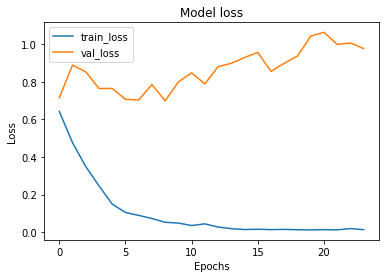

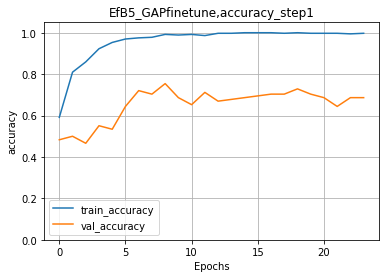

In [0]:
print(history1.history.keys())
plt.figure(1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc=' right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')

plt.savefig(folder_save+'/loss1.png')
plt.show()

plt.figure(2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title(method_class+',accuracy_step1')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.ylim(0,1.05)
plt.grid(True)
plt.legend(['train_accuracy','val_accuracy'], loc=' right')
plt.savefig(folder_save+'/dice1.png')
plt.show()

In [0]:
a = history1.history
list_valacc = a['val_accuracy']
argmax = [i for i, a in enumerate(list_valacc) if a == max(list_valacc)]
list_ws = next(os.walk('weights_save1'))[2]
argmax = argmax[-1]
if argmax < 9:
  best_dir = [a for a in list_ws if a.find('.0'+str(argmax+1)+'-') != -1]
else:
  best_dir = [a for a in list_ws if a.find('.'+str(argmax+1)+'-') != -1]
model.load_weights(os.path.join('weights_save1', best_dir[0]))
print(argmax, best_dir)
save_weights = True
if save_weights:
  model.save_weights('step1_weight.h5')
# from google.colab import drive as drv
# drv.mount('/content/drive')
 
file_name = 'Good_weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

shutil.copyfile('step1_weight.h5', 'Good_weights_save/'+method_class+'_step1_weight.h5')




In [0]:
# shutil.copyfile('Good_weights_save/step1_weight.h5',folder_save+'step1_weight.h5')
shutil.copyfile('step1_weight.h5', 'Good_weights_save/'+method_class+'_step1_weight.h5')
# shutil.copyfile('Good_weights_save/'+method_class+'_step1_weight.h5', method_class+'/step1_weight.h5')


'Good_weights_save/EfB5_GAPfinetune_step1_weight.h5'

## compile step 2 (option)

In [0]:
file_name = 'weights_save2'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)



In [0]:
model.load_weights('Good_weights_save/'+method_class+'_step1_weight.h5')
# Step 2
earlystop2= EarlyStopping(monitor='val_loss',patience=22,mode='min',verbose=1)
mcp2=ModelCheckpoint('weights_save2/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_accuracy', verbose=1, save_weights_only=True, mode='auto')

model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.Nadam(1e-5),metrics=['accuracy'])
# model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.Nadam(3e-4),metrics=['accuracy'])
# history2 = model.fit_generator(train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500, callbacks = [earlystop2,mcp2],verbose=1, validation_data = (x_test, y_test))
history2 = model.fit_generator(
    train_gen, steps_per_epoch=x_train.shape[0]//batch_size,epochs = 500,
    callbacks = [earlystop2,mcp2],verbose=1,
    validation_data = (x_val, y_val))



# efficientunet1.unfreeze_efficientunet(S)
# #efficientunet.freeze_efficientunet_first_n_blocks(S,2)
# #run_index = 1 # increment every time you train the model
# #run_logdir = os.path.join('/content', "my_logs", "run_{:03d}".format(run_index))
# #tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
# rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=7, min_lr=1e-7, verbose=1)
# model.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(5e-5),metrics=[dice_coef, jaccard_coef])
# earlystop1= EarlyStopping(monitor='val_loss',patience=22,mode='min',verbose=1)
# # mcp1 =ModelCheckpoint("focal_2017/weight{val_loss:.5f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
# # mcp1 =ModelCheckpoint("focal_2017/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
# mcp1 =ModelCheckpoint("/content/weights_save/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)


# history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)




Epoch 1/500
23/23 [==============================] - 91s 4s/step - loss: 0.0637 - accuracy: 0.9779 - val_loss: 0.6908 - val_accuracy: 0.7288

Epoch 00001: saving model to weights_save2/weights.01-0.7288.hdf5
Epoch 2/500
23/23 [==============================] - 46s 2s/step - loss: 0.0611 - accuracy: 0.9890 - val_loss: 0.6976 - val_accuracy: 0.7034

Epoch 00002: saving model to weights_save2/weights.02-0.7034.hdf5
Epoch 3/500
23/23 [==============================] - 46s 2s/step - loss: 0.0379 - accuracy: 0.9945 - val_loss: 0.7156 - val_accuracy: 0.6949

Epoch 00003: saving model to weights_save2/weights.03-0.6949.hdf5
Epoch 4/500
23/23 [==============================] - 46s 2s/step - loss: 0.0392 - accuracy: 0.9917 - val_loss: 0.7295 - val_accuracy: 0.6949

Epoch 00004: saving model to weights_save2/weights.04-0.6949.hdf5
Epoch 5/500
23/23 [==============================] - 46s 2s/step - loss: 0.0393 - accuracy: 0.9945 - val_loss: 0.7438 - val_accuracy: 0.6780

Epoch 00005: saving model 

In [0]:
# folder_save = 'Save_Results/'+method_class
# # if os.path.exists(file_name):
# #   shutil.rmtree(file_name)
  
# os.makedirs(file_name)

In [0]:
loss=history2.history['loss']
val_loss=history2.history['val_loss']
accuracy=(history2.history['accuracy'])
val_accuracy=(history2.history['val_accuracy'])

import scipy.io as sio
sio.savemat(folder_save+'/list_history2_pretrained.mat'
            , {'loss': loss, 'accuracy': accuracy,  'val_loss':val_loss, 'val_accuracy': val_accuracy})



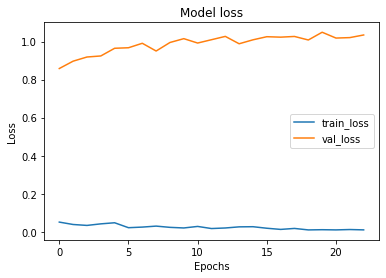

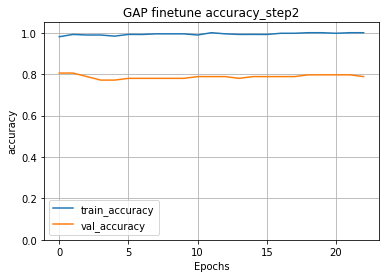

In [0]:
plt.figure(1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc=' right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')

plt.savefig(folder_save+'/loss2.png')
plt.show()

plt.figure(2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('GAP finetune accuracy_step2')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.ylim(0,1.05)
plt.grid(True)
plt.legend(['train_accuracy','val_accuracy'], loc=' right')
plt.savefig(folder_save+'/dice2.png')
plt.show()

## Evaluate and Test

##Pick good weights

In [0]:
weight_list=next(os.walk('weights_save2/'))[2]

weight_list.sort()
print(weight_list)

['weights.01-0.8051.hdf5', 'weights.02-0.8051.hdf5', 'weights.03-0.7881.hdf5', 'weights.04-0.7712.hdf5', 'weights.05-0.7712.hdf5', 'weights.06-0.7797.hdf5', 'weights.07-0.7797.hdf5', 'weights.08-0.7797.hdf5', 'weights.09-0.7797.hdf5', 'weights.10-0.7797.hdf5', 'weights.11-0.7881.hdf5', 'weights.12-0.7881.hdf5', 'weights.13-0.7881.hdf5', 'weights.14-0.7797.hdf5', 'weights.15-0.7881.hdf5', 'weights.16-0.7881.hdf5', 'weights.17-0.7881.hdf5', 'weights.18-0.7881.hdf5', 'weights.19-0.7966.hdf5', 'weights.20-0.7966.hdf5', 'weights.21-0.7966.hdf5', 'weights.22-0.7966.hdf5', 'weights.23-0.7881.hdf5']


In [0]:
# i='weights.01-0.8473.hdf5'
# model.load_weights(os.path.join('weights_save2/',i))
# model.evaluate(x_test)

In [0]:
score_dict=dict()
for i in weight_list:
  model.load_weights(os.path.join('weights_save2/',i))
  score = model.evaluate(x_test,y_test)
  print(i,' test accuracy : ',round(score[1],4))
  score_dict[score[1]]=i


In [0]:
# score_dict=dict()
# for i in weight_list:
#   try:
#     # S.load_weights(os.path.join('focal_2017',i))
#     model.load_weights(os.path.join('weights_save2/',i))
#     [score_loss,score] = model.evaluate(x_test,y_test)
#     print(i,' test accuracy : ',round(score[1],4))
#     score_dict[score[1]]=i
#   except:
#     print("could not load: " ,i)
#     continue

In [0]:
best_score=max(score_dict.keys())
best_weight=score_dict[best_score]
print('best weight for test: ',best_weight," , with acc= : ", round(best_score,4))


model.load_weights('weights_save2/'+best_weight)
model.save_weights('best_weight.h5')

shutil.copyfile('best_weight.h5', 'Good_weights_save/best_weight.h5')
shutil.copyfile('best_weight.h5', folder_save+'/best_weight.h5')

# model.evaluate(x_test)
y_pred= model.predict(x_test)

best weight for test:  weights.24-0.7542.hdf5  , with acc= :  0.867


##ROC curve

In [0]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, fbeta_score, recall_score, precision_score
def cal_confusion_matrics(y_pred, y_true, thresh_val = 0.5):
  y_binary = np.where(y_pred >= thresh_val, 1.0, 0.0)
  true_positive = 0
  false_negative = 0
  false_positive = 0
  true_negative = 0
  for i, items in enumerate(y_binary):
    if items == y_true[i]:
      if items == 1.0:
        true_positive += 1
      else:
        true_negative += 1
    else:
      if items == 1.0:
        false_positive += 1
      else:
        false_negative += 1

  sensitivity = true_positive / (true_positive + false_negative)
  specificity = true_negative / (true_negative + false_positive)
  accuracy = (true_positive + true_negative) / y_pred.shape[0]
  return sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive)

def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.901, 0.01):
        score = fbeta_score(y_true, np.array(y_pred)>thresh, beta = 1)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [0]:
thresh_val = 0.5
sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive) = cal_confusion_matrics(y_pred, y_test, thresh_val = thresh_val)
auc = roc_auc_score(y_test, y_pred)
aps = average_precision_score(y_test, y_pred)
f1 = fbeta_score(y_test, 1.0*(y_pred>thresh_val), beta = 1)
print(recall_score(y_test, 1.0*(y_pred>thresh_val)), precision_score(y_test, 1.0*(y_pred>thresh_val)))
print(sensitivity, specificity, accuracy, (true_positive, false_negative, true_negative, false_positive))
print(auc, aps, f1)

0.8571428571428571 0.865979381443299
0.8571428571428571 0.8761904761904762 0.8669950738916257 (84, 14, 92, 13)
0.9048590864917396 0.8646120601842608 0.8615384615384615


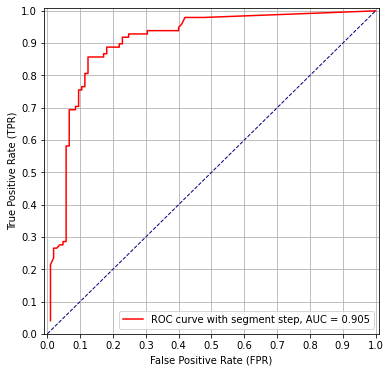

In [0]:
tpr = []
fpr = []
tpr2 = []
fpr2 = []
for i in range(50001):
  thresh_val = i*0.00002
  a, b, c, d = cal_confusion_matrics(y_pred, y_test, thresh_val=thresh_val)
  tpr.append(a)
  fpr.append(1-b)
  # a2, b2, c2, d2 = cal_confusion_matrics(y_pred2, y_test, thresh_val=thresh_val)
  # tpr2.append(a2)
  # fpr2.append(1-b2)

axisRange = [0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.figure(figsize=(6,6))
lw = 1
plt.grid(True)
# plt.plot(fpr2, tpr2,'b-',label='ROC curve without segment step' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred2),3)))
plt.plot(fpr, tpr,'r-',label='ROC curve with segment step' + ', AUC = '+str(round(roc_auc_score(y_test, y_pred),3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.savefig(folder_save+'/ROC.png')
plt.show()

##Others

##Ref define model

In [0]:
with strategy.scope():
  S = efficientunet1.get_efficient_unet_b3((192,256,3), pretrained=True, block_type='transpose', concat_input=True,out_channels=1,version=2)
  S.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(0.001),metrics=[dice_coef, jaccard_coef])

50126848/50122568 [==============================] - 1s 0us/step


In [0]:
S.summary()


In [0]:
efficientunet1.freeze_efficientunet_first_n_blocks(S,26)
S.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(0.001),metrics=[dice_coef, jaccard_coef])

In [0]:
file_name = '/content/weights_save'
if os.path.exists(file_name):
  shutil.rmtree(file_name)
  
os.mkdir(file_name)

In [0]:
mcp = ModelCheckpoint("/content/weights_save/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)
earlystop= EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=2)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=5, min_lr=1e-6, verbose=1)
# history1 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp],verbose=1)
history1 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
	    epochs=500,callbacks=[rlr,earlystop,mcp],verbose=1)

a = history1.history
list_valacc = a['val_acc']
argmax = [i for i, a in enumerate(list_valacc) if a == max(list_valacc)]
list_ws = next(os.walk('/content/weights_save'))[2]
argmax = argmax[-1]
if argmax < 9:
  best_dir = [a for a in list_ws if a.find('.0'+str(argmax+1)+'-') != -1]
else:
  best_dir = [a for a in list_ws if a.find('.'+str(argmax+1)+'-') != -1]
S.load_weights(os.path.join('/content/weights_save', best_dir[0]))
print(argmax, best_dir)
save_weights = True
if save_weights:
  S.save_weights('step1_weight_pretrained.h5')
# from google.colab import drive as drv
# drv.mount('/content/drive')
 
shutil.copyfile('step1_weight_pretrained.h5', '/content/drive/My Drive/Skin_Nhat_Toan/step1_weight_pretrained.h5')


In [0]:
a = history1.history
list_valacc = a['val_acc']
argmax = [i for i, a in enumerate(list_valacc) if a == max(list_valacc)]
list_ws = next(os.walk('/content/weights_save'))[2]
argmax = argmax[-1]
if argmax < 9:
  best_dir = [a for a in list_ws if a.find('.0'+str(argmax+1)+'-') != -1]
else:
  best_dir = [a for a in list_ws if a.find('.'+str(argmax+1)+'-') != -1]
S.load_weights(os.path.join('/content/weights_save', best_dir[0]))
print(argmax, best_dir)
save_weights = True
if save_weights:
  S.save_weights('step1_weight_pretrained.h5')
# from google.colab import drive as drv
# drv.mount('/content/drive')
 
shutil.copyfile('step1_weight_pretrained.h5', '/content/drive/My Drive/Skin_Nhat_Toan/step1_weight_pretrained.h5')


In [0]:
S.load_weight('step1_weight_pretrained.h5')
# Step 2
efficientunet1.unfreeze_efficientunet(S)
#efficientunet.freeze_efficientunet_first_n_blocks(S,2)
#run_index = 1 # increment every time you train the model
#run_logdir = os.path.join('/content', "my_logs", "run_{:03d}".format(run_index))
#tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=7, min_lr=1e-7, verbose=1)
S.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(5e-5),metrics=[dice_coef, jaccard_coef])
earlystop1= EarlyStopping(monitor='val_loss',patience=22,mode='min',verbose=1)
# mcp1 =ModelCheckpoint("focal_2017/weight{val_loss:.5f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
# mcp1 =ModelCheckpoint("focal_2017/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
mcp1 =ModelCheckpoint("/content/weights_save/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)


history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)




## Learning curve

In [0]:
plt.figure(1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc=' right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')

plt.savefig('loss.png')
plt.show()

plt.figure(2)
plt.plot(history1.history['dice_coef'])
plt.plot(history1.history['val_dice_coef'])
plt.title('Dice coefficient')
plt.ylabel('Dice coefficient')
plt.xlabel('Epochs')
plt.legend(['train_dice','val_dice'], loc=' right')
plt.savefig('dice.png')
plt.show()

In [0]:
print(history1.history.keys())

dict_keys(['loss', 'jaccard_coef', 'dice_coef', 'val_loss', 'val_jaccard_coef', 'val_dice_coef', 'lr'])


In [0]:
loss=history1.history['loss']
val_loss=history1.history['val_loss']
dice_coef=(history1.history['dice_coef'])
val_dice_coef=(history1.history['val_dice_coef'])
jaccard_coef=(history1.history['jaccard_coef'])
val_jaccard_coef=(history1.history['val_jaccard_coef'])
lr=(history1.history['lr'])


In [0]:
import scipy.io as sio
sio.savemat('list_history1_pretrained.mat'
            , {'loss': loss, 'jaccard_coef': jaccard_coef, 'dice_coef':dice_coef, 'val_loss':val_loss, 'val_jaccard_coef': val_jaccard_coef,'val_dice_coef':val_dice_coef,'lr': lr})


In [0]:
loss=history2.history['loss']
val_loss=history2.history['val_loss']
dice_coef=(history2.history['dice_coef'])
val_dice_coef=(history2.history['val_dice_coef'])
jaccard_coef=(history2.history['jaccard_coef'])
val_jaccard_coef=(history2.history['val_jaccard_coef'])
lr=(history2.history['lr'])
import scipy.io as sio
sio.savemat('list_history2_pretrained.mat'
            , {'loss': loss, 'jaccard_coef': jaccard_coef, 'dice_coef':dice_coef, 'val_loss':val_loss, 'val_jaccard_coef': val_jaccard_coef,'val_dice_coef':val_dice_coef,'lr': lr})


# Other Statistics and Validation

In [0]:
#------------------------------Others python Packages---------------------------
import numpy as np # High-level mathematical functions for n-dimensional arrays 
import os   
import cv2
import skimage.io as io
import skimage.transform as trans
import numpy as np
import glob
from PIL import Image
import skimage
from keras.initializers import Constant
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
from skimage.measure import label, regionprops
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import jaccard_similarity_score
import numpy, scipy.io
from sklearn.metrics import confusion_matrix
def Performance_Metrics2(y_true, y_pred):

    if y_true.shape != y_pred.shape:
        raise ValueError("Shape mismatch!! y_true and y_pred must have the same shape.")

    y_true_f = (y_true/y_true.max()).flatten()
    y_pred_f = (y_pred/y_pred.max()).flatten()
    
    intersection = np.sum(y_true_f * y_pred_f)
    
    dsc = (2. * intersection ) / (np.sum(y_true_f) + np.sum(y_pred_f))
    iou = (intersection) / (np.sum(y_true_f) + np.sum(y_pred_f)-intersection)
    
#     y_true = np.asarray(y_true).astype(np.bool)
#     y_pred = np.asarray(y_pred).astype(np.bool)
        
#     y_true=y_true.flatten()
#     y_pred=y_pred.flatten()
    y_pred = (y_pred > 0.5)
    y_true = y_true.ravel() # we want to make them into vectors
    y_pred = y_pred.ravel() # we want to make them into vectors
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    sensitivity = (tp)/(fn+tp)
    specificity = (tn)/(tn+fp)
    balancedAccuracy = (sensitivity+specificity)/2
#might be wrong??
    return dsc, iou, accuracy, sensitivity, specificity, balancedAccuracy

def jaccard_mask(y_true, y_pred, smooth = 1.):

    intersection = np.sum(np.abs(y_true * y_pred))
    sum_ = np.sum(np.abs(y_true)) + np.sum(np.abs(y_pred))

    score = intersection/ (sum_ -intersection)
    return score 
#--------------------------
# dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test1, pred)

#-------------------------------------------




In [0]:
# efficientunet1.unfreeze_efficientunet(S)
# #efficientunet.freeze_efficientunet_first_n_blocks(S,2)
# #run_index = 1 # increment every time you train the model
# #run_logdir = os.path.join('/content', "my_logs", "run_{:03d}".format(run_index))
# #tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
# rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=7, min_lr=1e-7, verbose=1)
# S.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(5e-5),metrics=[dice_coef, jaccard_coef])
# earlystop1= EarlyStopping(monitor='val_loss',patience=22,mode='min',verbose=1)
# # mcp1 =ModelCheckpoint("focal_2017/weight{val_loss:.5f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
# mcp1 =ModelCheckpoint("focal_2017/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)

# history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)

In [0]:

# history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)

In [0]:
methodseg='effunet_skip2_pretrained'
# history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# 	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)

# weight_list=next(os.walk('focal_2017'))[2]
weight_list=next(os.walk('/content/weights_save/'))[2]

weight_list.sort()
print(weight_list)


['best_pretrained.h5', 'weight.01-0.8849.h5', 'weight.02-0.8819.h5', 'weight.03-0.8783.h5', 'weight.04-0.8766.h5', 'weight.05-0.8785.h5', 'weight.06-0.8787.h5', 'weight.07-0.8779.h5', 'weight.08-0.8795.h5', 'weight.09-0.8781.h5', 'weight.10-0.8793.h5', 'weight.11-0.8786.h5', 'weight.12-0.8734.h5', 'weight.13-0.8745.h5', 'weight.14-0.8756.h5', 'weight.15-0.8758.h5', 'weight.16-0.8763.h5', 'weight.17-0.8738.h5', 'weight.18-0.8748.h5', 'weight.19-0.8718.h5', 'weight.20-0.8737.h5', 'weight.21-0.8749.h5', 'weight.22-0.8769.h5', 'weight.23-0.8737.h5', 'weight.24-0.8765.h5', 'weight.25-0.8773.h5', 'weight.26-0.8753.h5', 'weight.27-0.8782.h5', 'weight.28-0.8730.h5', 'weight.29-0.8766.h5', 'weight.30-0.8780.h5', 'weight.31-0.8779.h5', 'weight.32-0.8786.h5', 'weight.33-0.8784.h5', 'weight.34-0.8791.h5', 'weight.35-0.8769.h5', 'weight.36-0.8784.h5', 'weight.37-0.8802.h5']


In [0]:
score_dict=dict()
for i in weight_list:
  try:
    # S.load_weights(os.path.join('focal_2017',i))
    S.load_weights(os.path.join('/content/weights_save/',i))
    score = S.evaluate(test_dataset)
    print(i,' co dice_coef la : ',round(score[1],4))
    score_dict[score[1]]=i
  except:
    print("khong load dc: " ,i)
    continue

best_score=max(score_dict.keys())
best_weight=score_dict[best_score]
print('weight tot nhat la ',best_weight," voi dice coef la : ", round(best_score,4))


S.load_weights('/content/weights_save/'+best_weight)
S.save_weights('My_weights/best_pretrained.h5')
S.evaluate(test_dataset)
y_pred= S.predict(x_test)
y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)

In [0]:
print('focal_2017/'+best_weight)

focal_2017/weight.23-0.8737.h5


In [0]:
S.save_weights(methodseg+'_'+best_weight)

5/5 [==============================] - 1s 213ms/step - loss: 0.2550 - jaccard_coef: 0.7506 - dice_coef: 0.8408
0.9471481345527619 (334995,) (334995,)
effunet_skip2_pretrained, mean Dice= 0.8526 , Jaccard= 0.743 ,Acc= 0.9354
AUC= 0.9471 , sensitivity= 0.8107 , specificity= 0.974 , blAcc= 0.8923


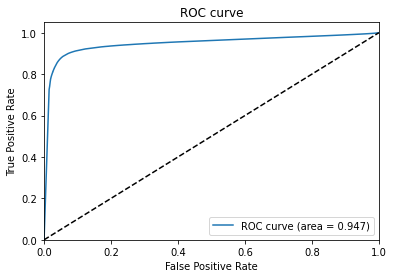

In [0]:
# methodseg='eff_unet'
# # history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
# # 	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)

# weight_list=next(os.walk('focal_2017'))[2]
# weight_list.sort()
# print(weight_list)

# score_dict=dict()
# for i in weight_list:
#   try:
#     S.load_weights(os.path.join('focal_2017',i))
#     score = S.evaluate(test_dataset)
#     print(i,' co dice_coef la : ',score[1])
#     score_dict[score[1]]=i
#   except:
#     print("khong load dc: " ,i)
#     continue
# best_score=max(score_dict.keys())
# best_weight=score_dict[best_score]
# print('weight tot nhat la ',best_weight," voi dice coef la : ", best_score)

# S.load_weights('focal_2017/weight.61-0.8944.h5')

S.evaluate(test_dataset)

# def plot_model(images, mask, pred, num_test):
#   x=np.random.randint(num_test,size=num_test)
#   for i in x:
#     plt.figure(i)
#     plt.subplot(131),plt.imshow(images[i]) , plt.title('image') , plt.axis('off')
#     plt.subplot(132),plt.imshow(mask[i,...,0],cmap='gray') , plt.title('labels') , plt.axis('off')
#     plt.subplot(133),plt.imshow(pred[i,...,0],cmap='gray') , plt.title('predict') , plt.axis('off')
#   plt.tight_layout()
# plt.show()
x_test_tensor=tf.convert_to_tensor(x_test,tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test,tf.float32)
np.save("data_resize/y_pred.npy",'y_pred')
# y_pred=np.load("data_resize/y_pred.npy")
y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)
# plot_model(x_test_tensor,y_test,y_pred_tensor,100)

em_thresh_vol=y_test;
em_image_vol=y_pred

from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = em_thresh_vol.ravel() # we want to make them into vectors
score_value = em_image_vol.ravel() # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)
print(roc_auc, fpr.shape, tpr.shape)

fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")

dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, y_pred)
sio.savemat('list_statistic_all.mat'
            , {'fpr': fpr, 'tpr': tpr, 'auc':roc_auc, 'accuracy':accuracy, 'sensitivity': sensitivity,'specificity':specificity,'balancedAccuracy':balancedAccuracy,'dsc': dsc, 'iou': iou})

# import shutil
# shutil.make_archive('Result_'+methodseg, 'zip', path2)

# dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, pred)
print(methodseg + ', mean Dice=', round(dsc,4), ', Jaccard=',round(iou,4), ',Acc=', round(accuracy,4))
print('AUC=',round(roc_auc,4),', sensitivity=', round(sensitivity,4), ', specificity=',round(specificity,4), ', blAcc=', round(balancedAccuracy,4))

# print(methodseg + ',  Dice=',round(np.mean(Dice_test),4), '+/-',round(np.std(Dice_test),4))
# print(methodseg + ', Jaccard=',round(np.mean(Jaccard_test),4), '+/-',round(np.std(Jaccard_test),4))



In [0]:
weight_list=next(os.walk('focal_2017'))[2]
weight_list.sort()
print(weight_list)

['weight0.14588.h5', 'weight0.14713.h5', 'weight0.14821.h5', 'weight0.14832.h5', 'weight0.14933.h5', 'weight0.15225.h5', 'weight0.16140.h5', 'weight0.16453.h5', 'weight0.16490.h5']


In [0]:
S.evaluate(test_dataset)
S.load_weights( 'focal_2017/weight0.14588.h5')
y_pred = S.predict(x_test)

np.save("data_resize/y_pred_1.npy",y_pred)
# y_pred=np.load("data_resize/y_pred.npy")
# y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)
# plot_model(x_test_tensor,y_test,y_pred_tensor,100)

em_thresh_vol=y_test;
em_image_vol=y_pred

from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = em_thresh_vol.ravel() # we want to make them into vectors
score_value = em_image_vol.ravel() # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)
print(roc_auc, fpr.shape, tpr.shape)

fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
ax.grid(True)

dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, y_pred)
sio.savemat(path2+'/list_statistic_all.mat'
            , {'fpr': fpr, 'tpr': tpr, 'auc':roc_auc, 'accuracy':accuracy, 'sensitivity': sensitivity,'specificity':specificity,'balancedAccuracy':balancedAccuracy,'dsc': dsc, 'iou': iou})

# import shutil
# shutil.make_archive('Result_'+methodseg, 'zip', path2)

# dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, pred)
print(methodseg + ', mean Dice=', round(dsc,4), ', Jaccard=',round(iou,4), ',Acc=', round(accuracy,4))
print('AUC=',round(roc_auc,4),', sensitivity=', round(sensitivity,4), ', specificity=',round(specificity,4), ', blAcc=', round(balancedAccuracy,4))


NameError: ignored

In [0]:
dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, y_pred)
sio.savemat('list_statistic_all.mat'
            , {'fpr': fpr, 'tpr': tpr, 'auc':roc_auc, 'accuracy':accuracy, 'sensitivity': sensitivity,'specificity':specificity,'balancedAccuracy':balancedAccuracy,'dsc': dsc, 'iou': iou})

# import shutil
# shutil.make_archive('Result_'+methodseg, 'zip', path2)

# dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, pred)
print(methodseg + ', mean Dice=', round(dsc,4), ', Jaccard=',round(iou,4), ',Acc=', round(accuracy,4))
print('AUC=',round(roc_auc,4),', sensitivity=', round(sensitivity,4), ', specificity=',round(specificity,4), ', blAcc=', round(balancedAccuracy,4))


NameError: ignored

In [0]:
axisRange = [-0.01, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0]
lw = 1
plt.grid(True)
# ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot(fpr_1, tpr_1,'--k',label=label_1 + ', AUC = '+str(round(auc_1,3)))
plt.plot(fpr_2, tpr_2,'-.g',label=label_2 + ', AUC = '+str(round(auc_2,3)))
plt.plot(fpr_3, tpr_3,'r',label=label_3 + ', AUC = '+str(round(auc_3+0.001,3)))

plt.plot(fpr_4, tpr_4,'b',label=label_4 + ', AUC = '+str(round(auc_4-0.001,3)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xticks(axisRange)
plt.yticks(axisRange)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [0]:
# #------------------------------Others python Packages---------------------------
# import numpy as np # High-level mathematical functions for n-dimensional arrays 
# import os   
# import cv2
# import skimage.io as io
# import skimage.transform as trans
# import numpy as np
# import glob
# from PIL import Image
# import skimage
# from keras.initializers import Constant
# from matplotlib import pyplot as plt
# %matplotlib inline
# from skimage.morphology import disk
# from sklearn.metrics import confusion_matrix
# from skimage.measure import label, regionprops
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import jaccard_similarity_score
# import numpy, scipy.io
# from sklearn.metrics import confusion_matrix
# def Performance_Metrics2(y_true, y_pred):

#     if y_true.shape != y_pred.shape:
#         raise ValueError("Shape mismatch!! y_true and y_pred must have the same shape.")

#     y_true_f = (y_true/y_true.max()).flatten()
#     y_pred_f = (y_pred/y_pred.max()).flatten()
    
#     intersection = np.sum(y_true_f * y_pred_f)
    
#     dsc = (2. * intersection ) / (np.sum(y_true_f) + np.sum(y_pred_f))
#     iou = (intersection) / (np.sum(y_true_f) + np.sum(y_pred_f)-intersection)
    
# #     y_true = np.asarray(y_true).astype(np.bool)
# #     y_pred = np.asarray(y_pred).astype(np.bool)
        
# #     y_true=y_true.flatten()
# #     y_pred=y_pred.flatten()
#     y_pred = (y_pred > 0.5)
#     y_true = y_true.ravel() # we want to make them into vectors
#     y_pred = y_pred.ravel() # we want to make them into vectors
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     accuracy = (tn+tp)/(tn+fp+fn+tp)
#     sensitivity = (tp)/(fn+tp)
#     specificity = (tn)/(tn+fp)
#     balancedAccuracy = (sensitivity+specificity)/2
# #might be wrong??
#     return dsc, iou, accuracy, sensitivity, specificity, balancedAccuracy

# def jaccard_mask(y_true, y_pred, smooth = 1.):

#     intersection = np.sum(np.abs(y_true * y_pred))
#     sum_ = np.sum(np.abs(y_true)) + np.sum(np.abs(y_pred))

#     score = intersection/ (sum_ -intersection)
#     return score 
# #--------------------------
# # dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test1, pred)

# #-------------------------------------------




In [0]:
em_thresh_vol=y_test;
em_image_vol=y_pred

from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = em_thresh_vol.ravel() # we want to make them into vectors
score_value = em_image_vol.ravel() # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)
print(roc_auc, fpr.shape, tpr.shape)

In [0]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")

In [0]:
import numpy, scipy.io
imsize_w=256
imsize_h=256
DSC_full=[]
Jaccard_full=[]
path2 = 'OM_data_result'
main_path =folder2save

if os.path.exists(path2):   
    shutil.rmtree(path2)
os.mkdir(path2)  

os.makedirs(path2+'/Test/auto_OM')
os.makedirs(path2+'/Test/auto_OM_png/')
os.makedirs(path2+'/Test/test_OM_png/')


img_test,pred_test, mask_test,Dice_test,Jaccard_test=save_auto_proposed(main_path,path2)

scipy.io.savemat(path2+'/Dice_Jaccard_test.mat', {'Dice_test':Dice_test,'Jaccard_test':Jaccard_test,'dsc': dsc, 'iou': iou})
sio.savemat(path2+'/list_statistic_all.mat'
            , {'fpr': fpr, 'tpr': tpr, 'auc':roc_auc, 'accuracy':accuracy, 'sensitivity': sensitivity,'specificity':specificity,'balancedAccuracy':balancedAccuracy,'dsc': dsc, 'iou': iou})

import shutil
shutil.make_archive('Result_'+methodseg, 'zip', path2)


In [0]:
# dsc, iou,accuracy, sensitivity, specificity, balancedAccuracy=Performance_Metrics2(y_test, pred)
print(methodseg + ', mean Dice=', round(dsc,4), ', Jaccard=',round(iou,4), ',Acc=', round(accuracy,4))
print('AUC=',round(roc_auc,4),', sensitivity=', round(sensitivity,4), ', specificity=',round(specificity,4), ', blAcc=', round(balancedAccuracy,4))

print(methodseg + ',  Dice=',round(np.mean(Dice_test),4), '+/-',round(np.std(Dice_test),4))
print(methodseg + ', Jaccard=',round(np.mean(Jaccard_test),4), '+/-',round(np.std(Jaccard_test),4))

In [0]:
plt.figure(1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc=' right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')
plt.savefig('loss.png')
plt.show()

plt.figure(2)
plt.plot(history1.history['dice_coef'])
plt.plot(history1.history['val_dice_coef'])
plt.title('Dice coefficient')
plt.ylabel('Dice coefficient')
plt.xlabel('Epochs')
plt.legend(['train_dice','val_dice'], loc=' right')
plt.savefig('dice.png')
plt.show()

# plt.plot(history1.history['dice_coef'])
# plt.plot(history1.history['val_dice_coef'])
# plt.title('model loss/dice_coef')
# plt.xlabel('Epochs')
# plt.ylabel('Dice coefficient')
# plt.legend(['train_loss', 'val_loss','train_dice','val_dice'], loc=' right')
# plt.savefig('loss1.png')
# plt.show()


In [0]:
efficientunet1.unfreeze_efficientunet(S)
#efficientunet.freeze_efficientunet_first_n_blocks(S,2)
#run_index = 1 # increment every time you train the model
#run_logdir = os.path.join('/content', "my_logs", "run_{:03d}".format(run_index))
#tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=7, min_lr=1e-7, verbose=1)
S.compile(loss = focal_tversky_loss,optimizer=tf.keras.optimizers.Nadam(5e-5),metrics=[dice_coef, jaccard_coef])
earlystop1= EarlyStopping(monitor='val_loss',patience=22,mode='min',verbose=1)

# mcp1 =ModelC?heckpoint("focal_2017/weight{val_loss:.5f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)
mcp1 =ModelCheckpoint("focal_2017/weight.{epoch:02d}-{val_dice_coef:.4f}.h5",mode='min',monitor='val_loss',verbose=1,save_weights_only=True)

history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)


print(history2.history.keys())

weight_list=next(os.walk('focal_2017'))[2]
weight_list.sort()
print(weight_list)


score_dict=dict()
for i in weight_list:
  try:
    S.load_weights(os.path.join('focal_2017',i))
    score = S.evaluate(test_dataset)
    print(i,' co dice_coef la : ',score[1])
    score_dict[score[1]]=i
  except:
    print("khong load dc: " ,i)
    continue

best_score=max(score_dict.keys())
best_weight=score_dict[best_score]
print('weight tot nhat la ',best_weight," voi dice coef la : ", best_score)

# S.load_weights('focal_2017/weight0.10645.h5')

S.evaluate(test_dataset)

def plot_model(images, mask, pred, num_test):
  x=np.random.randint(num_test,size=num_test)
  for i in x:
    plt.figure(i)
    plt.subplot(131),plt.imshow(images[i]) , plt.title('image') , plt.axis('off')
    plt.subplot(132),plt.imshow(mask[i,...,0],cmap='gray') , plt.title('labels') , plt.axis('off')
    plt.subplot(133),plt.imshow(pred[i,...,0],cmap='gray') , plt.title('predict') , plt.axis('off')
  plt.tight_layout()
  plt.show()

x_test_tensor=tf.convert_to_tensor(x_test,tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test,tf.float32)

y_pred=np.load("data_resize/y_pred.npy")

y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)
plot_model(x_test_tensor,y_test,y_pred_tensor,100)

In [0]:
history2 = S.fit(train_dataset,validation_data=val_dataset,steps_per_epoch=steps_per_epoch,
	    epochs=500,callbacks=[rlr,earlystop,mcp1],verbose=1)

Epoch 1/500
27/27 [==============================] - ETA: 0s - jaccard_coef: 0.8813 - dice_coef: 0.9345 - loss: 0.0774
Epoch 00001: saving model to focal_2017/weight0.8880.h5
27/27 [==============================] - 120s 4s/step - jaccard_coef: 0.8813 - dice_coef: 0.9345 - loss: 0.0774 - val_jaccard_coef: 0.8165 - val_dice_coef: 0.8880 - val_loss: 0.1492 - lr: 5.0000e-05
Epoch 2/500
27/27 [==============================] - ETA: 0s - jaccard_coef: 0.8841 - dice_coef: 0.9362 - loss: 0.0760
Epoch 00002: saving model to focal_2017/weight0.8868.h5
27/27 [==============================] - 14s 536ms/step - jaccard_coef: 0.8841 - dice_coef: 0.9362 - loss: 0.0760 - val_jaccard_coef: 0.8144 - val_dice_coef: 0.8868 - val_loss: 0.1476 - lr: 5.0000e-05
Epoch 3/500
27/27 [==============================] - ETA: 0s - jaccard_coef: 0.8836 - dice_coef: 0.9360 - loss: 0.0757
Epoch 00003: saving model to focal_2017/weight0.8889.h5
27/27 [==============================] - 14s 523ms/step - jaccard_coef: 0.8

In [0]:
#%load_ext tensorboard
#%tensorboard --logdir=/content/my_logs --port=6006

In [0]:
print(history1.history.keys())

dict_keys(['loss', 'jaccard_coef', 'dice_coef', 'val_loss', 'val_jaccard_coef', 'val_dice_coef', 'lr'])


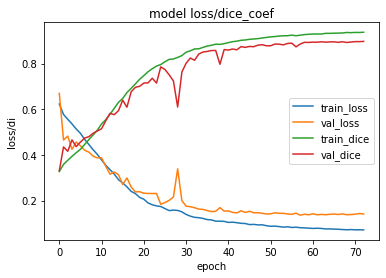

In [0]:
'''
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['dice_coef'])
plt.plot(history1.history['val_dice_coef'])
plt.title('model loss/dice_coef')
plt.ylabel('loss/di')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss','train_dice','val_dice'], loc=' right')
plt.savefig('loss1.png')
plt.show()
'''

In [0]:
weight_list=next(os.walk('focal_2017'))[2]
weight_list.sort()
print(weight_list)

['weight0.10561.h5', 'weight0.10595.h5', 'weight0.10602.h5', 'weight0.10615.h5', 'weight0.10619.h5', 'weight0.10638.h5', 'weight0.10645.h5', 'weight0.10650.h5', 'weight0.10660.h5', 'weight0.10665.h5', 'weight0.10667.h5', 'weight0.10677.h5', 'weight0.10689.h5', 'weight0.10700.h5', 'weight0.10718.h5', 'weight0.10766.h5']


In [0]:
score_dict=dict()
for i in weight_list:
  try:
    S.load_weights(os.path.join('focal_2017',i))
    score = S.evaluate(test_dataset)
    print(i,' co dice_coef la : ',score[1])
    score_dict[score[1]]=i
  except:
    print("khong load dc: " ,i)
    continue


5/5 [==============================] - 13s 3s/step - dice_coef: 0.9049 - loss: 0.1433 - jaccard_coef: 0.8399
weight0.10561.h5  co dice_coef la :  0.9049457907676697
5/5 [==============================] - 1s 194ms/step - dice_coef: 0.9046 - loss: 0.1449 - jaccard_coef: 0.8393
weight0.10595.h5  co dice_coef la :  0.9046018719673157
5/5 [==============================] - 1s 194ms/step - dice_coef: 0.9046 - loss: 0.1440 - jaccard_coef: 0.8391
weight0.10602.h5  co dice_coef la :  0.9045631289482117
5/5 [==============================] - 1s 192ms/step - dice_coef: 0.9042 - loss: 0.1467 - jaccard_coef: 0.8383
weight0.10615.h5  co dice_coef la :  0.9042320251464844
5/5 [==============================] - 1s 192ms/step - dice_coef: 0.9041 - loss: 0.1455 - jaccard_coef: 0.8385
weight0.10619.h5  co dice_coef la :  0.9041285514831543
5/5 [==============================] - 1s 193ms/step - dice_coef: 0.9045 - loss: 0.1468 - jaccard_coef: 0.8390
weight0.10638.h5  co dice_coef la :  0.9044510126113892


In [0]:
best_score=max(score_dict.keys())
best_weight=score_dict[best_score]
print('weight tot nhat la ',best_weight," voi dice coef la : ", best_score)

# S.load_weights('focal_2017/weight0.10645.h5')

# S.evaluate(test_dataset)

# def plot_model(images, mask, pred, num_test):
#   x=np.random.randint(num_test,size=num_test)
#   for i in x:
#     plt.figure(i)
#     plt.subplot(131),plt.imshow(images[i]) , plt.title('image') , plt.axis('off')
#     plt.subplot(132),plt.imshow(mask[i,...,0],cmap='gray') , plt.title('labels') , plt.axis('off')
#     plt.subplot(133),plt.imshow(pred[i,...,0],cmap='gray') , plt.title('predict') , plt.axis('off')
#   plt.tight_layout()
#   plt.show()

# x_test_tensor=tf.convert_to_tensor(x_test,tf.float32)
# y_test_tensor=tf.convert_to_tensor(y_test,tf.float32)

# y_pred=np.load("data_resize/y_pred.npy")

# y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)
# plot_model(x_test_tensor,y_test,y_pred_tensor,100)

weight tot nhat la  weight0.10645.h5  voi dice coef la :  0.9049849510192871


In [0]:
S.load_weights('focal_2017/weight0.10645.h5')

In [0]:
S.evaluate(test_dataset)

5/5 [==============================] - 1s 193ms/step - dice_coef: 0.9050 - loss: 0.1433 - jaccard_coef: 0.8393


[0.14329828321933746, 0.9049849510192871, 0.8392802476882935]

In [0]:
def plot_model(images, mask, pred, num_test):
  x=np.random.randint(num_test,size=num_test)
  for i in x:
    plt.figure(i)
    plt.subplot(131),plt.imshow(images[i]) , plt.title('image') , plt.axis('off')
    plt.subplot(132),plt.imshow(mask[i,...,0],cmap='gray') , plt.title('labels') , plt.axis('off')
    plt.subplot(133),plt.imshow(pred[i,...,0],cmap='gray') , plt.title('predict') , plt.axis('off')
  plt.tight_layout()
  plt.show()


In [0]:
x_test_tensor=tf.convert_to_tensor(x_test,tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test,tf.float32)

In [0]:
#y_pred= S.predict(x_test_tensor)


In [0]:
#np.save("/content/drive/My Drive/aominebka992/segmentation ISIC/data_resize/y_pred.npy",y_pred)

In [0]:
y_pred=np.load("data_resize/y_pred.npy")

In [0]:
y_pred_tensor=tf.convert_to_tensor(y_pred,tf.float32)

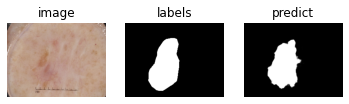

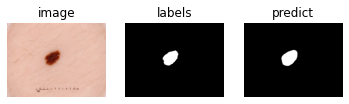

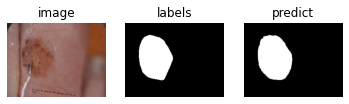

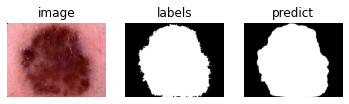

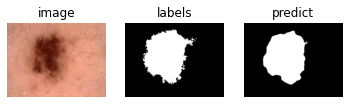

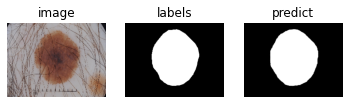

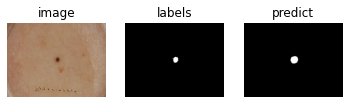

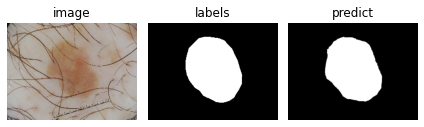

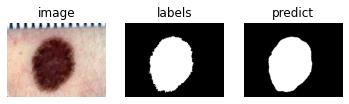

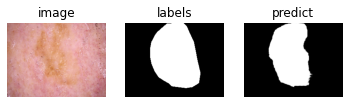

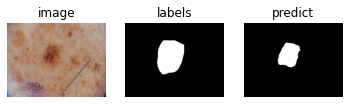

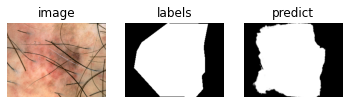

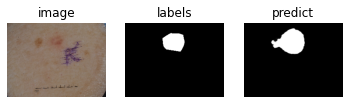

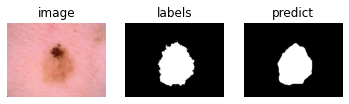

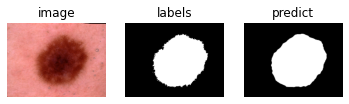

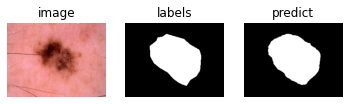

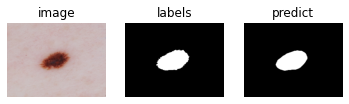

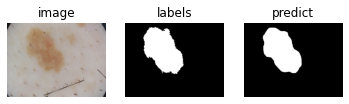

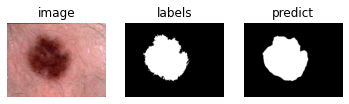

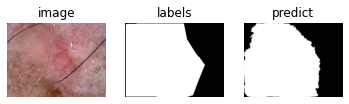

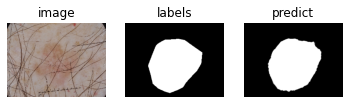

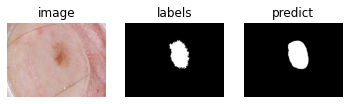

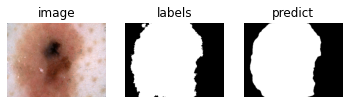

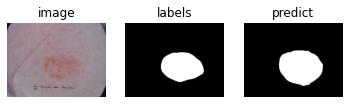

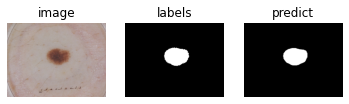

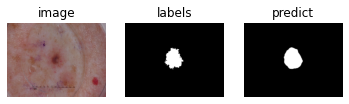

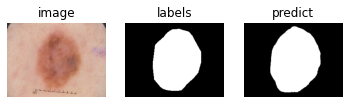

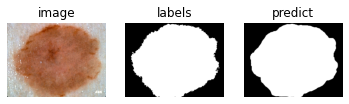

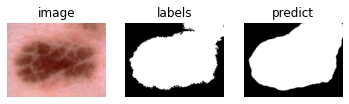

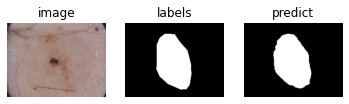

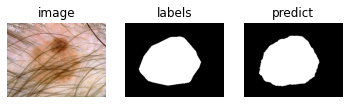

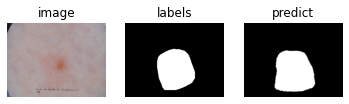

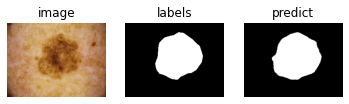

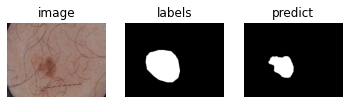

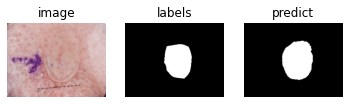

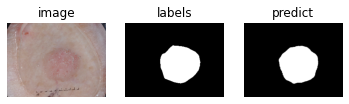

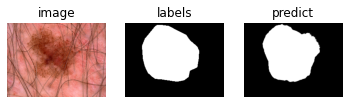

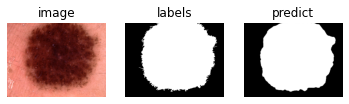

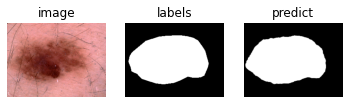

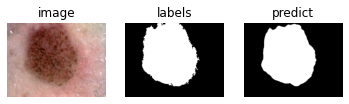

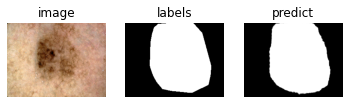

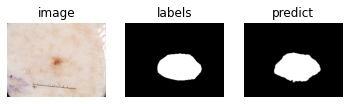

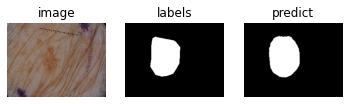

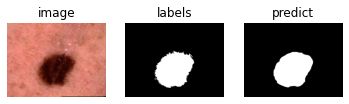

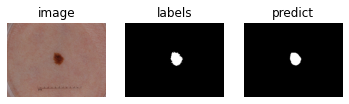

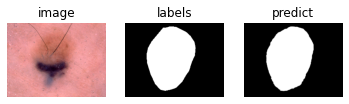

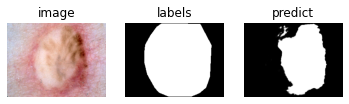

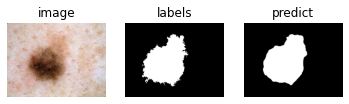

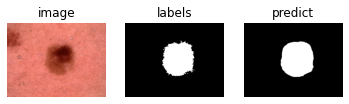

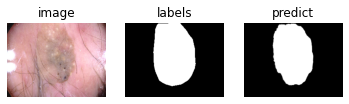

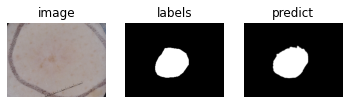

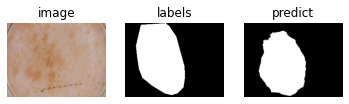

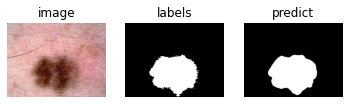

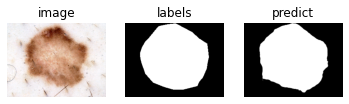

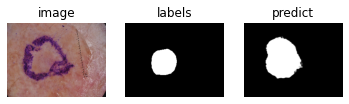

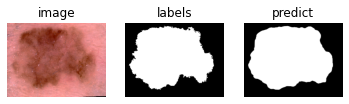

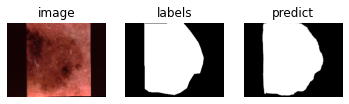

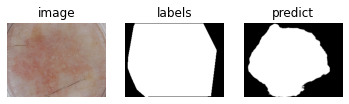

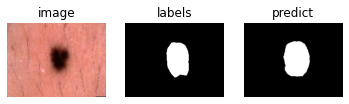

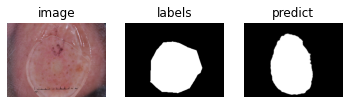

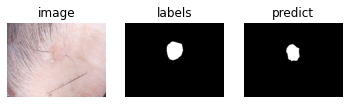

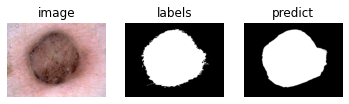

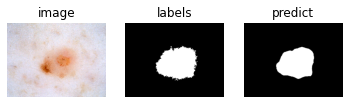

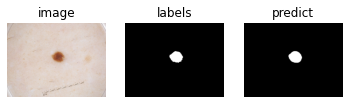

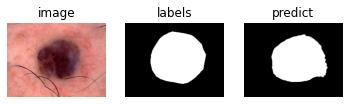

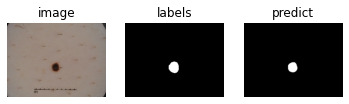

In [0]:
plot_model(x_test_tensor,y_test,y_pred_tensor,100)